# Numerical Methods I
### [Gerard Gorman](http://www.imperial.ac.uk/people/g.gorman), [Matthew Piggott](http://www.imperial.ac.uk/people/m.d.piggott), [Nicolas Barral](http://www.imperial.ac.uk/people/n.barral)

# Lecture 4: Roots of Equations

## Learning objectives:

* Identify nonlinear equations
* Solve these equations using the `scipy.optimize` functions `bisect` and `newton` 
* Explain the algorithms that underlie the Bisection, Newton and Secant method
* Explain why these methods are considered *iterative* and *approximative* and how this relates to *tolerances*
* Explain three types of *convergence* errors

## Nonlinear Equations

A **system is said to be linear** if it can be represented by a **linear function** (*i.e.* a straight line):
\begin{equation}
f(x) = a + kx\,,
\end{equation}
where $f(x)$ is a value of interest depending on some variable $x$, which can be quantified through measurements or observations.

To a linear system we can associate a **linear equation**, which can be written in the form:
\begin{equation}
f(x) = 0 \mathrm{\quad\quad where\quad\quad} f(x) = a + kx\,,
\end{equation}

However, most systems in Earth Science cannot be expressed in such simple terms. They are then called nonlinear systems, and equations representing them contain terms like:
\begin{equation}
x^2, x^3, \mathrm{tan}(x), \mathrm{sin}(x), \mathrm{ln}(x), \mathrm{erf}(x), \sqrt{x}...
\end{equation}

You should be familiar, for example, with quadratic equations $a x^2 + bx + c = 0$, for which there exists the well known analytic solutions:
\begin{equation}
x^*_{1,2} = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}\,.
\end{equation}

The solutions $x^*_{1,2}$ are commonly referred to as the **roots** of the equation. 

A popular example in math classes without trivial solution is:

\begin{equation}
x = \tan(x)
\end{equation}

There is no know exact solution to this equation, so we have to devise methods to find **approximate roots** of this equation, *i.e.* $x_{approx}$ such that $x_{approx} \approx \tan(x_{approx})$ to a set **tolerance** (or **precision**).

<span style="color:blue">Exercise: Why is this equation non linear ? Can you tell how many roots this equation has ?</span>

# Picard's method of successive approximations

In this section, we consider equations that can be written under the form:
$$
x = g(x)\,,
$$
where g is a function.
The simplest method to find approximate roots to this kind of equations consists in guessing $x$, plugging it into the right-hand-side $g$ and then evaluate the equation. The resulting new value for $x$ is then used as the next best guess. 
A sequence of $x_n$ are thus defined such that:

\begin{equation}
x_{n+1} = g(x_n).
\end{equation}

This procedure is repeated until two consecutive values for $x$ differ by less than some defined error limit. 

This strategy is often referred to as (Picard's) method of successive approximations. A pseudo pseudo-code description of this solution strategy looks like

```
guess x
x_previous = x+2*tolerance
while abs(x - x_previous) > tolerance do   
    x_previous = x
    x = g(x_previous)
```

## <span style="color:blue">Exercise 4.1: Complete the implementation of the method of successive approximations below to solve $x=\mathrm{e}^{-x}$</span>

In [ ]:
%pylab notebook

def picard(fct, x, atol=1.0E-4):
    x_prev = x+2*atol
    while # complete
        # complete
    return x

def g(x):
    return np.exp(-x)

print(picard(g, 0.9)) # 0.9 is our initial guess

Looking at the intermediate results $x_n$ in $x_{n+1} = g(x_n)$ and plotting them alongside $x = \mathrm{e}^{-x}$ we find

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


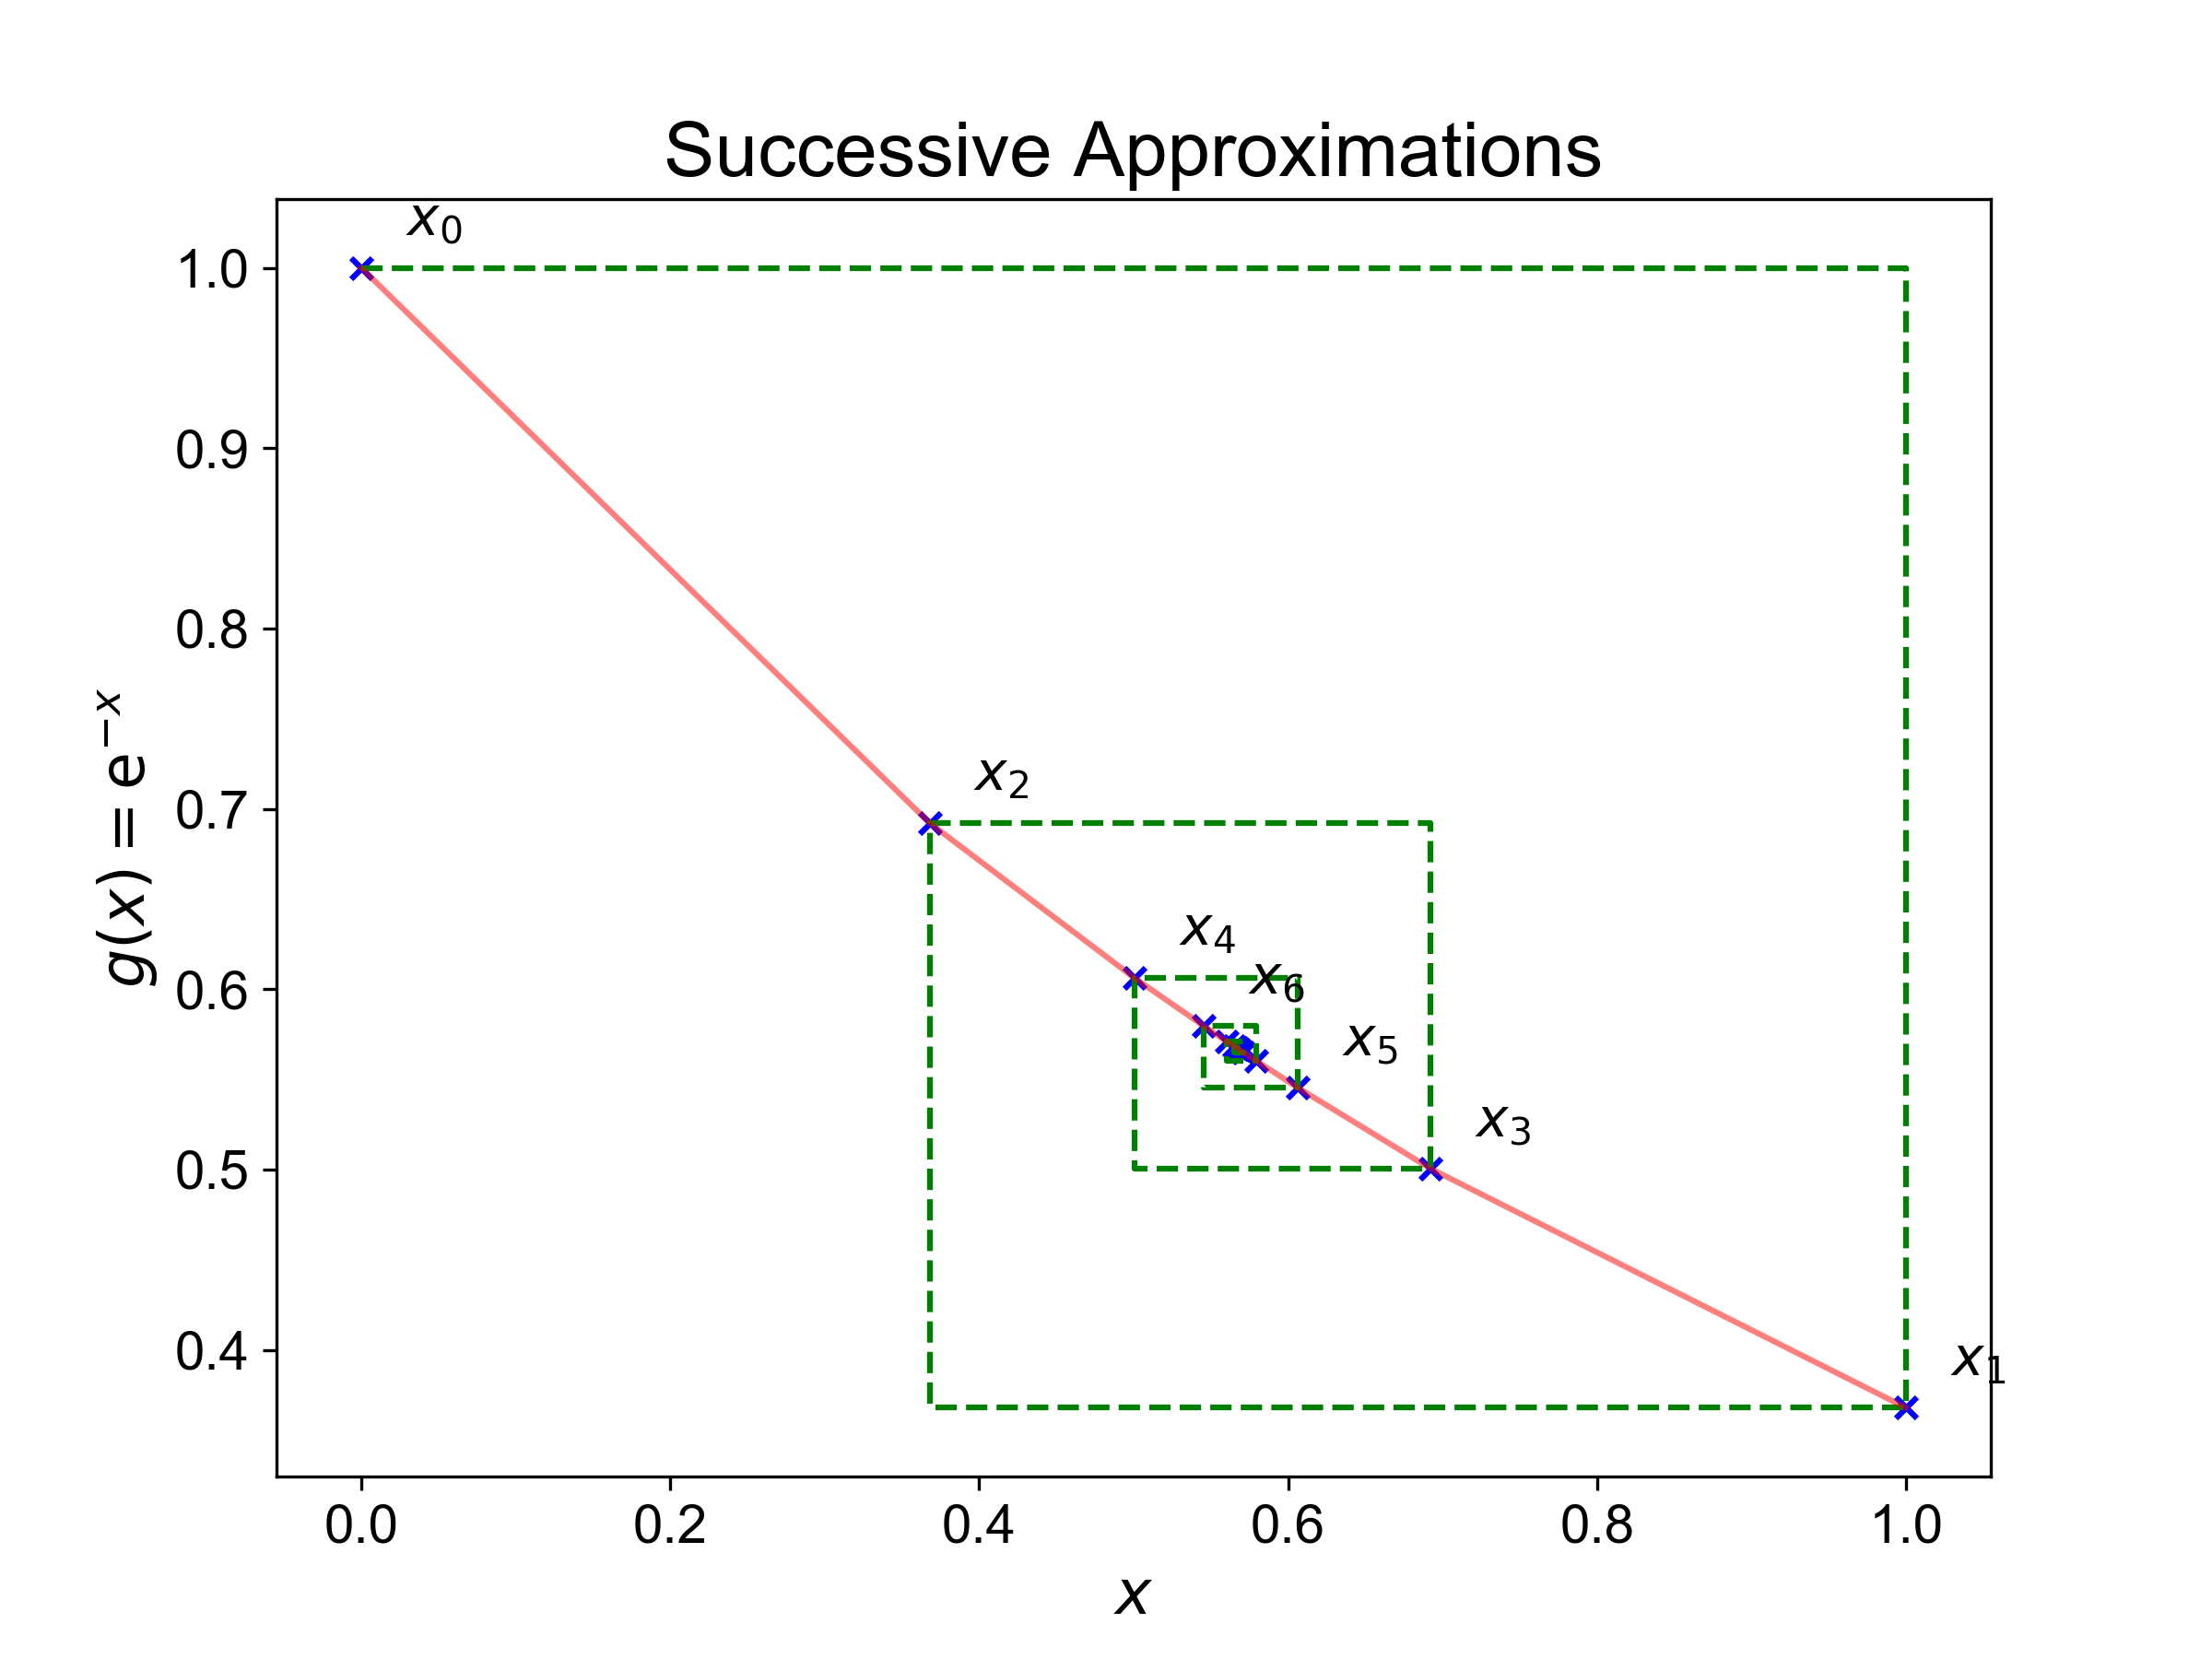

x_00 = 0.00000
x_01 = 1.00000
x_02 = 0.36788
x_03 = 0.69220
x_04 = 0.50047
x_05 = 0.60624
x_06 = 0.54540
x_07 = 0.57961
x_08 = 0.56012
x_09 = 0.57114
x_10 = 0.56488
x_11 = 0.56843
x_12 = 0.56641
x_13 = 0.56756
x_14 = 0.56691
x_15 = 0.56728
x_16 = 0.56707
x_17 = 0.56719


In [1]:
# THIS CELL IS FOR ILLUSTRATIONAL PURPOSES ONLY
import auxilliary_plots  # only for illustrational purposes
def g(x):
    return np.exp(-x)
auxilliary_plots.picard_convergence_pattern(g, 0., flabel=r'$g(x) = \mathrm{e}^{-x}$')

This plot shows that our algorithm *converges* to the point where $x = g(x)$, which in our case is $x = \mathrm{e}^{-x}$, the point along the function where both $x$ and $g(x)$ equal ~0.57. It should be obvious that this method is iterative in nature and that the solution can be expected to be an approximation accurate to $\epsilon \leq$ `tol`. 

Another approach is to plot $x$ and $\mathrm{e}^{-x}$ and find the intersection:

<IPython.core.display.Javascript object>


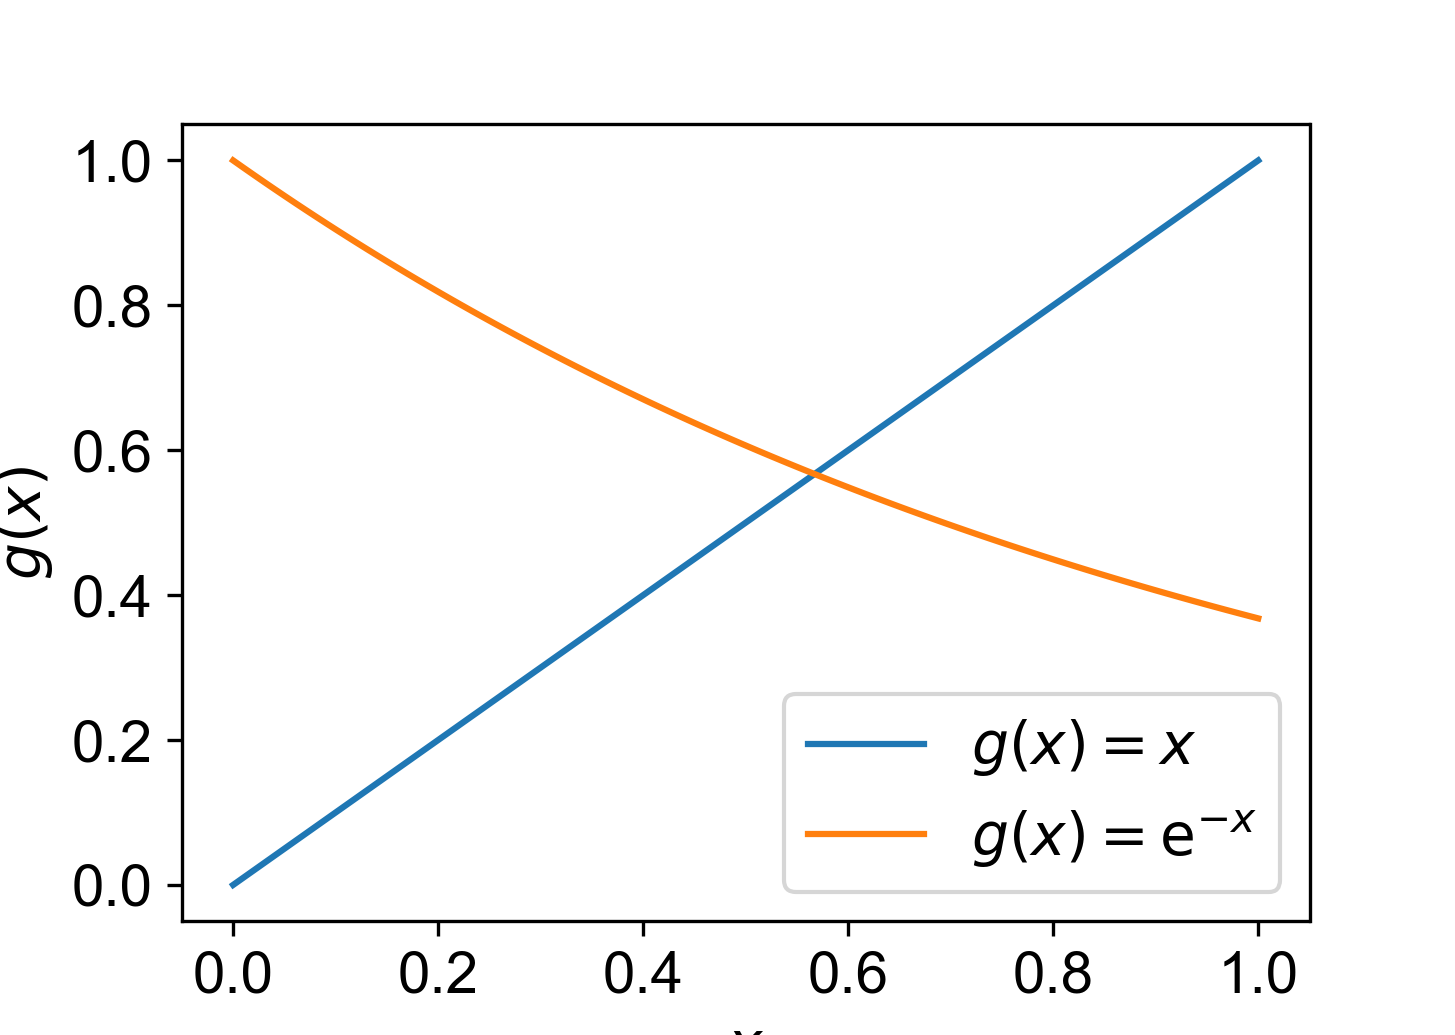

In [2]:
xspace = linspace(0,1,100)
plot(xspace, xspace, label='$g(x)=x$')
plot(xspace, np.exp(-xspace), label='$g(x)=\mathrm{e}^{-x}$')
legend()
xlabel('$x$'); ylabel('$g(x)$')
show()

It is obvious that this graphical method shows the intersection point, $x = \mathrm{e}^{-x}$, also at ~0.57. This value is a root of the problem, as it satisfies 

\begin{equation}
f(x) = 0 = x - \mathrm{e}^{-x}
\end{equation}

In this expression we rearranged $x = \mathrm{e}^{-x}$ to $0 = x - \mathrm{e}^{-x}$ and defined $f(x) = x - \mathrm{e}^{-x}$. Thus, another solution strategy  is to find a value $x^*$ such that $f(x^*) = 0$, or, in our case, $x^* - \mathrm{e}^{-x^*} = 0$. 

<IPython.core.display.Javascript object>


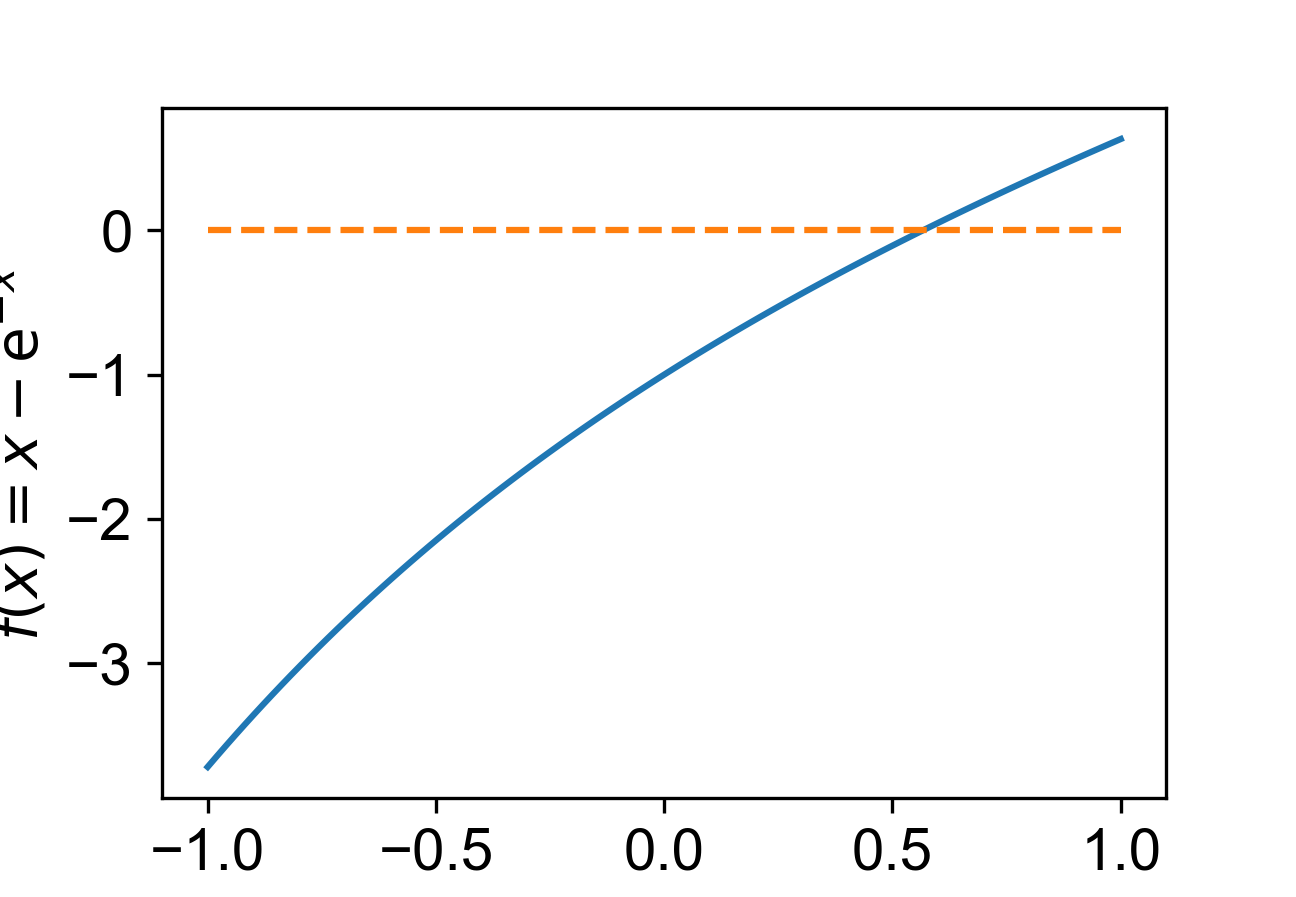

In [3]:
xspace = linspace(-1,1,100)
plot(xspace, xspace-np.exp(-xspace))
plot(xspace, np.zeros_like(xspace), '--')
xlabel('$x$'); ylabel('$f(x) = x - \mathrm{e}^{-x}$')
show()

The graph shows the root of $f(x)$ at our solution $x^* \approx 0.57$. By visual inspection, we see that $f(x)$ has a root $f(x^*) = 0$ in the interval $x^* \in (-1,1)$. 

## <span style="color:blue">Exercise 4.2: By means of visual inspection of $2x + x \mathrm{sin}(x-3) = 5$ in $x \in (-10,10)$, find a subinterval $x \in(a,b)$ such that (1) there exists $x^* \in (a,b)$ such that $f(x^*) = 0$ and (2) $f(x)$ is [monotonic](https://en.wikipedia.org/wiki/Monotonic_function)</span>

In [ ]:
def f(x):
    return # complete

xspace = linspace(-10,10,100)
# complete
show()

It seems that between $x \in (0,5)$, e.g., $a$ = 0 and $b$ = 5 and within, there exists a root and the function is monotonically increasing.

# Root Bracketing

By visual inspection we can identify if roots exist for a function, and narrow down the interval in which a root can be found. For the equation $f(x) = x - \mathrm{e}^{-x}$, we have shown by plotting that a root is bounded in $(-1,1)$, and that the $f(x)$ is monotonically increasing in this interval. With this in mind, we can define a root bracketing algorithm that marches along $f(x)$ in increments of $\Delta x$ and identifies a new, closer bracket of the root by detecting a **change in sign of $f(x)$**. This algorithm is also referred to as incremental search. The approach can be visualized as follows:

<IPython.core.display.Javascript object>


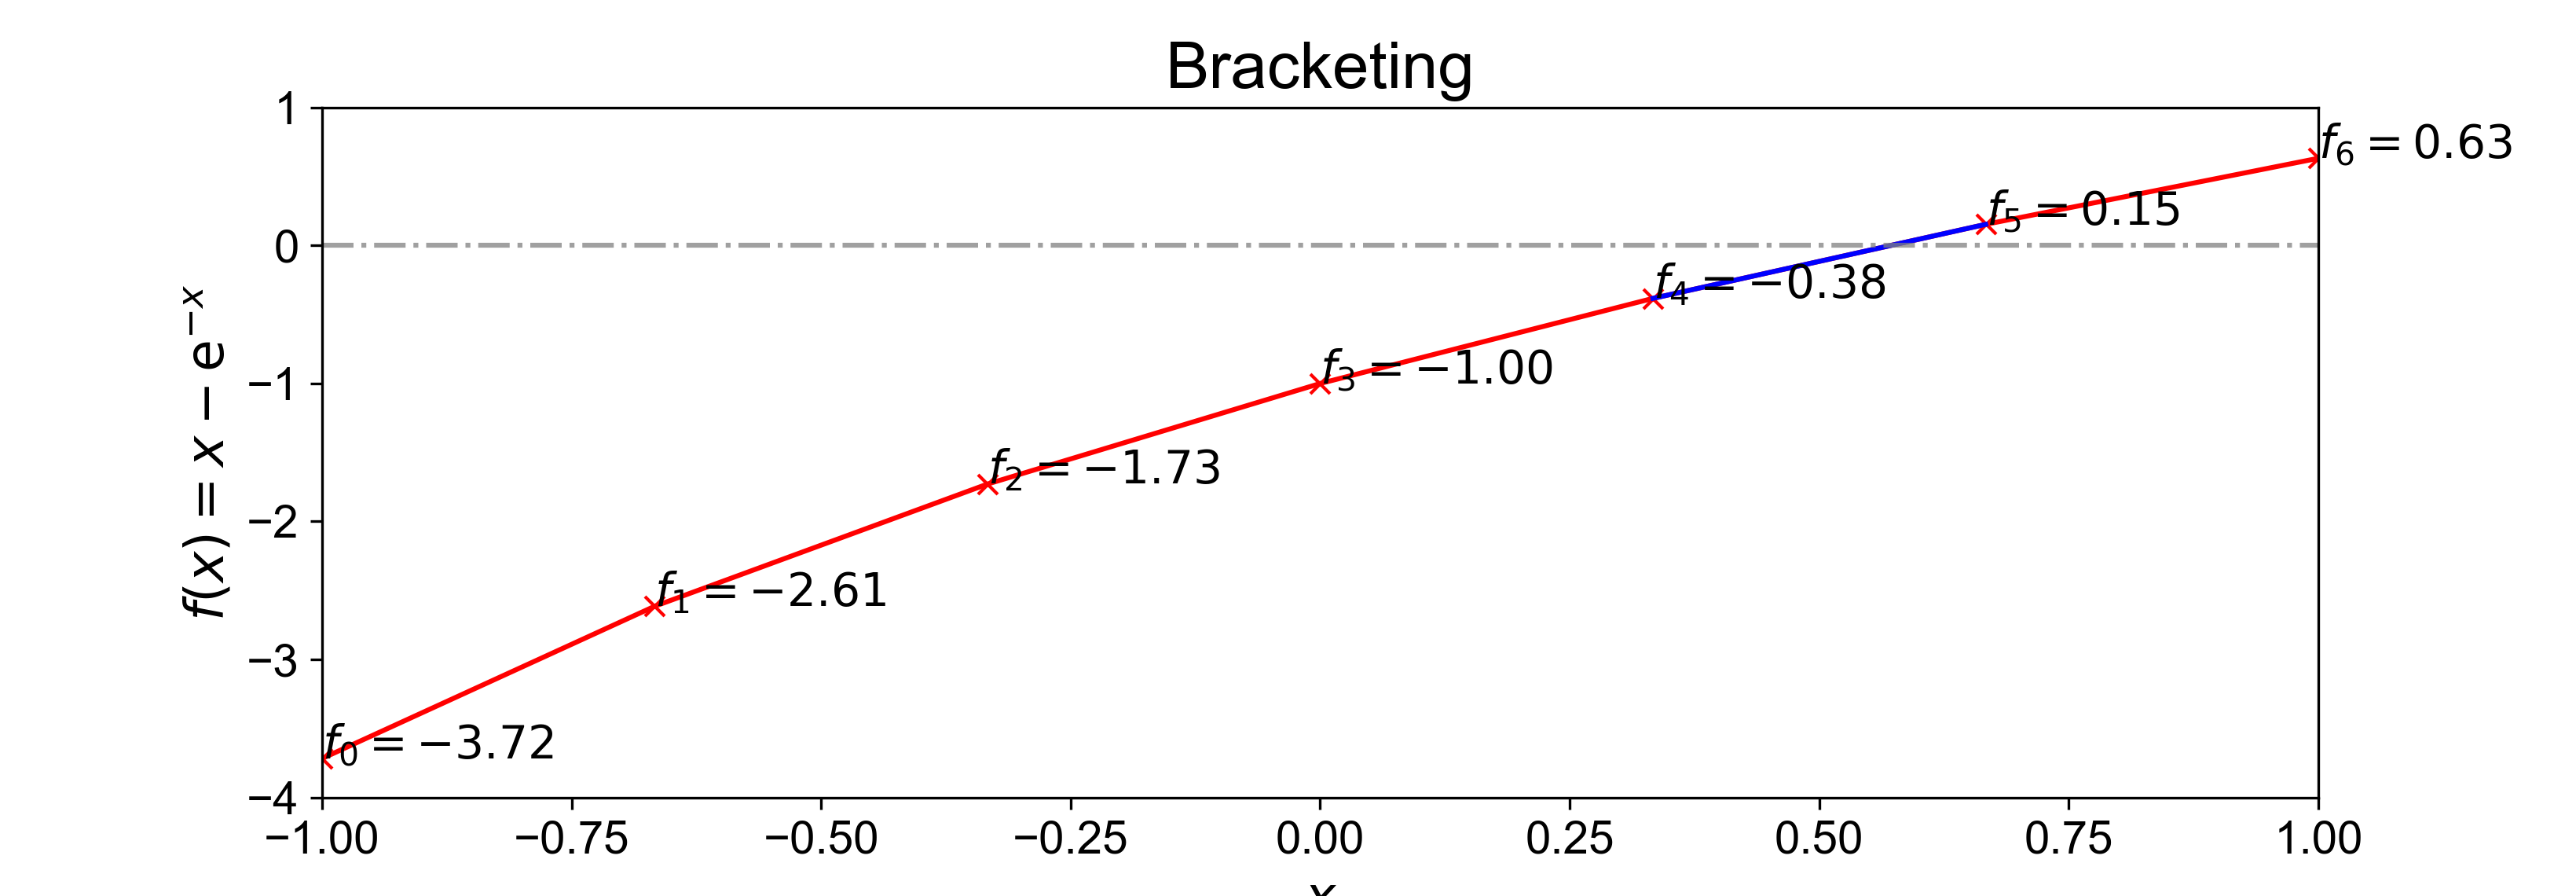

In [10]:
# THIS CELL IS FOR ILLUSTRATIONAL PURPOSES ONLY
def f(x):
    return x - np.exp(-x)

auxilliary_plots.root_bracketing_pattern(f, -1., 1., 0.3, flabel=r'$f(x) = x - \mathrm{e}^{-x}$')

## <span style="color:blue">Exercise 4.3: For $2x + x \mathrm{sin}(x-3) = 5$, use the subinterval $x \in(a,b)$ you found in Exercise 4.2 and complete the code below to implement a root bracketing algorithm. Derive the concept from the Figure above</span>

In [ ]:
def f(x):
    return #complete

def root_bracketing(fct, a, b, dx):
    sgn = sign(fct(a)) #The sign function returns -1 if x < 0, 0 if x==0, 1 if x > 0.
    while #complete
        #complete
        if a >= b:
            raise RuntimeError('no root within [a,b]')
    return (a-dx, a)

a, b = 0., 5.
dx = 0.1
print(root_bracketing(f, a, b, dx))


# Bisection Method

Once we know a root can be found in $x \in (a,b)$, we can close in on it with an algorithm similar to incremental search, but with a smart switch to gradually decrease $\Delta x$ by a factor of 1/2, and change the marching direction depending on the sign of $f(x_1)f(x_2)$, where $x_1$ and $x_2$  are local bounds during the marching process.

The algorithm works as follows. If there is a root in the interval $[x_1, x_2]$, then $f(x_1)f(x_2) < 0$. In order to halve the interval, we compute $f(x_3)$, where $x_3 = (x_1 + x_2)/2$ is the midpoint of the interval. If $f(x_2)f(x_3) < 0$, then the root must be in $[x_2, x_3]$, and we record this by replacing the original bound $x_1$ by $x_3$. Otherwise, the root lies in $[x_1, x_3]$, in which case $x_2$ is replaced by $x_3$. In either case, the new interval $[x_1, x_2]$ is half the size of the original interval. The bisection is repeated until the interval has been reduced to some tolerance. A visualization of the method illustrates the narrowing in of an ever-smaller bracket:

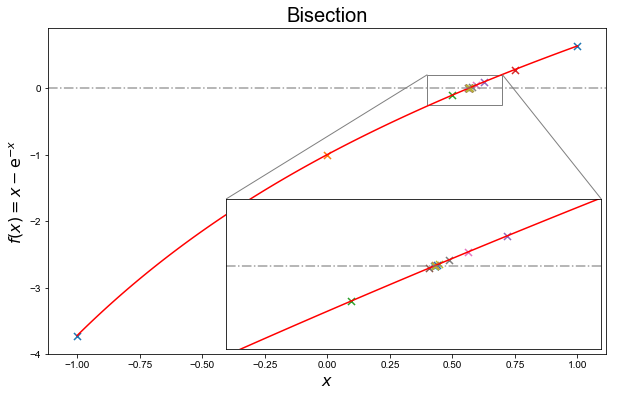

In [5]:
# THIS CELL IS FOR ILLUSTRATIONAL PURPOSES ONLY
def f(x):
    return x - np.exp(-x)

auxilliary_plots.bisection_pattern(f, -1., 1., flabel=r'$f(x) = x - \mathrm{e}^{-x}$')

This algorithm has been implemented in the [scipy.optimize](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html) module:

In [6]:
import scipy.optimize as scop

def f(x):
    return x - np.exp(-x)

a, b = -1., 1.
print(scop.bisect(f, a, b))

0.5671432904109679


## <span style="color:blue">Exercise 4.4: For $2x + x \mathrm{sin}(x-3) = 5$, use the subinterval $x \in(a,b)$ you found in Exercise 4.2 and complete the code below to implement a bisection algorithm. Derive the concept from a <a href="https://en.wikipedia.org/wiki/Bisection_method#Algorithm">pseudo-code description</a> and compare the result to [scipy.optimize.bisect](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html)</span>

In [ ]:
import scipy.optimize as scop

def bisection(fct, a, b, atol=1.0E-6, nmax=100):
    n = 0
    while n <= nmax:
        # complete
    raise RuntimeError('no root found within [a,b]')

def f(x):
    return # complete

a, b = # complete
print(bisection(f, a, b))
print(scop.bisect(f, a, b))


# Newton Method

So far, above iterative algorithms use only one part of a functions information: its value, $f(x)$. Newton's method additionally uses $f'(x)$ to infer the trend of the function in the vicinity of $x$. This slope, together with the function value $f(x)$, is used to find the intersection of the tangent at $x$ with zero to get an improved guess of the root. The formula can be derived from the Taylor series expansion:

\begin{equation}
f(x_{i+1}) = f(x_i) + f'(x_i)(x_{i+1}-x_i) + O(x_{i+1} - x_i)^2
\end{equation}

Let $f(x_{i+1}) = 0$ to find

\begin{equation}
0 = f(x_i) + f'(x_i)(x_{i+1}-x_i) + O(x_{i+1} - x_i)^2
\end{equation}

assuming $x_{i+1}$ close to $x_{i}$ we drop the higher order terms to find

\begin{equation}
x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}
\end{equation}

which is the **Newton-Raphson formula**.

A pseudo pseudo-code for the algorithm looks like this:

```
guess x[0]
do
    x[i] = x[i-1] - f(x[i-1])/dfdx(x[i-1])
while abs(x[i] - x[i-1]) > tolerance
```

The expression of the associated error indicates quadratic convergence:

\begin{equation}
\epsilon_{i+1} = -\frac{f''(x)}{2f'(x)} \epsilon_{i}^2
\end{equation}

Illustrated, for $f(x) = x - \mathrm{e}^{-x}$, this approximation looks like

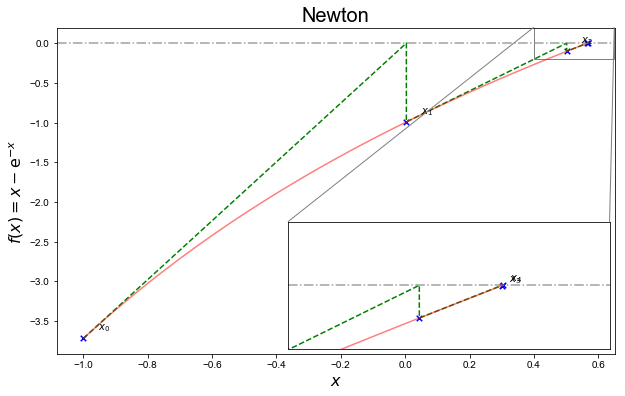

In [7]:
# THIS CELL IS FOR ILLUSTRATIONAL PURPOSES ONLY
def f(x):
    return x - np.exp(-x)

x0 = -1.
auxilliary_plots.newton_convergence_pattern(f, 1E-2, x0, 1E-3, 2, loc0=4, loc1=2, loc2=1, 
                                            zoom=4, ixmin=0.4, ixmax=0.65, iymin=-0.2, iymax=0.2, 
                                            flabel=r'$f(x) = x - \mathrm{e}^{-x}$')

This algorithm has been implemented in the [scipy.optimize](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) module:

In [8]:
def f(x):
    return x - np.exp(-x)

def dfdx(x):
    return 1 + np.exp(-x)

x0 = -1. # initial guess
print(scop.newton(f, x0, dfdx))

0.56714329041


## <span style="color:blue">Exercise 4.5: For $2x + x \mathrm{sin}(x-3) = 5$, use $a$ from the subinterval $x \in(a,b)$ you found in Exercise 4.2 as initial guess $x_0$ and complete the code below to implement a Newton algorithm. Compare the result to [scipy.optimize.newton](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)</span>

In [ ]:
import scipy.optimize as scop

def newton(fct, x0, dfdx, atol=1.0E-6):
    x = [x0]
    # complete

def f(x):
    return # complete

def dfdx(x):
    return # complete

x0 = 0. # initial guess somwhere in interval
print(newton(f, x0, dfdx))
print(scop.newton(f, x0, dfdx))

The implementation of the Newton method above assumes that the derivative $f^\prime(x)$ is readily available. For many problems, however, the derivative is not easy to express analytically. In these cases $f^\prime(x)$ is replaced by a difference approximation. You learned about numerical differentiation in a previous lecture, in particular

\begin{equation}
f'(x) \approx \frac{f(x+\Delta x) - f(x)}{\Delta x}
\end{equation}

## <span style="color:blue">Exercise 4.6: Extend the Newton algorithm to compute $f^\prime(x)$ using a finite difference approximation. Compare the result to [scipy.optimize.newton](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)</span>

In [ ]:
def newton(fct, x0, dx=1.0E-7, atol=1.0E-6):
    x = [x0]
    # complete
    
def f(x):
    return # complete

x0 = 0.
print(newton(f, x0))
print(scop.newton(f, x0))

# Secant Method

The Secant method replaces the local derivative in the Newton method by a difference approximation based on two consecutive $x_n$. It follows that

\begin{equation}
f'(x_n) \approx \frac{f(x_n) - f(x_{n-1})}{x_n - x_{n-1}}
\end{equation}

which leads to the secant method

\begin{equation}
x_{n+1} = x_n - f(x_n) \left ( \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})} \right )
\end{equation}

The algorithm can be visualized as follows:

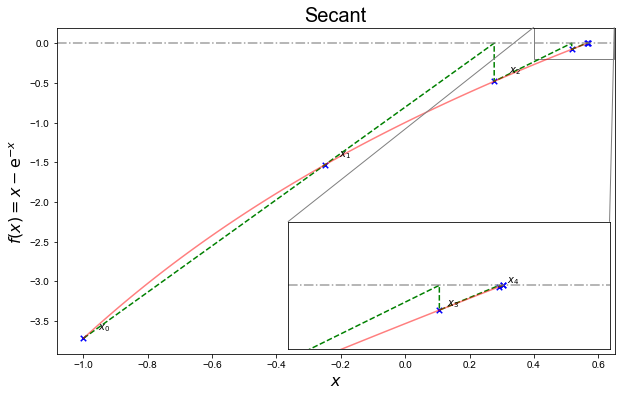

In [9]:
# THIS CELL IS FOR ILLUSTRATIONAL PURPOSES ONLY
%matplotlib inline
import auxilliary_plots 
 
def f(x):
    return x - np.exp(-x)

x0 = -1.
x1 = x0+0.75
auxilliary_plots.secant_convergence_pattern(f, x0, x1, 1E-3, 2, loc0=4, loc1=2, loc2=1, 
                                            zoom=4, ixmin=0.4, ixmax=0.65, iymin=-0.2, iymax=0.2, 
                                            flabel=r'$f(x) = x - \mathrm{e}^{-x}$')

## <span style="color:blue">Exercise 4.6: For $2x + x \mathrm{sin}(x-3) = 5$, use $a$ from the subinterval $x \in(a,b)$ you found in Exercise 4.2 to find $x_0 = a$ and $x_1 = a+0.1$ and complete the code below to implement a Secant algorithm. Compare the result to [scipy.optimize.newton](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)</span>

In [ ]:
def secant(fct, x0, x1, atol=1.0E-6):
    x = [x0,x1]
    # complete

def f(x):
    return # complete

# now we need to starting points
x0 = 0.
x1 = x0+0.1
print(secant(f, x0, x1))
print(scop.newton(f, x0))

# Convergence Issues

Let's first illustrate the basic concept of Newton root-finding methods for a well behaved function

\begin{equation}
f(x) = x^4 - 5
\end{equation}

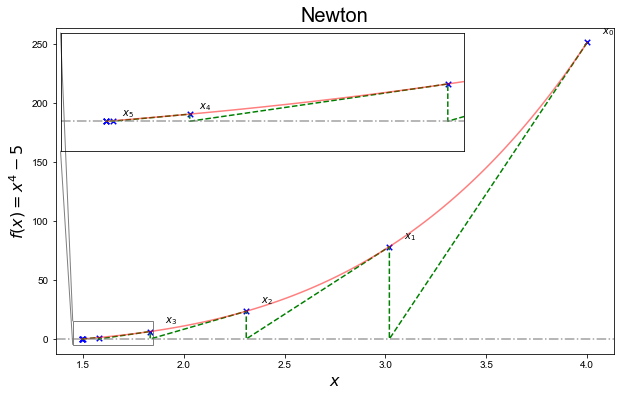

In [10]:
# THIS CELL IS FOR ILLUSTRATIONAL PURPOSES ONLY
def f(x):
    return x**4 - 5

x0 = 4.0
auxilliary_plots.newton_convergence_pattern(f, 1E-8, x0, 1E-7, 3, loc0=2, loc1=3, loc2=2, zoom=5, 
                                            ixmin=1.45, ixmax=1.85, iymin=-5, iymax=15, flabel=r'$f(x) = x^4 - 5$')

You should intuitively understand by now that the convergence of the *root bracketing* and *bisection methods* depends on the initial values provided to the algorithm. Complex equations, or systems thereof, provide plenty situations that prevent convergence all together or cause convergence to an undesired root. Their solution strongly depends on a *good* initial guess. For example,

\begin{equation}
f(x) = x \mathrm{sin}(\pi x)-\mathrm{e}^{-x}
\end{equation}

provides for ample pitfalls, in particular for gradient based (Newton, Secant) methods.

We will illustrate these convergence issues below. They mostly fall in one of thee categories

* Multiple roots in the vicinity - the algorithm converges to one of them depending on slight changes in the initial guess
* Nearly singular/numerical overflow - the local gradient at guess $x_n$ is near zero, so that $x_{n+1}$, the intersection of the local gradient approximation with $f(x) = 0$, is beyond the representable range
* Oscillations - the algorithm bounces back and forth between identical $x_n$

## Multiple Roots

For many functions, multiple roots exist and the algorithm depends on the initial value (here 0.0 and 0.1), as it converges to different roots

<IPython.core.display.Javascript object>


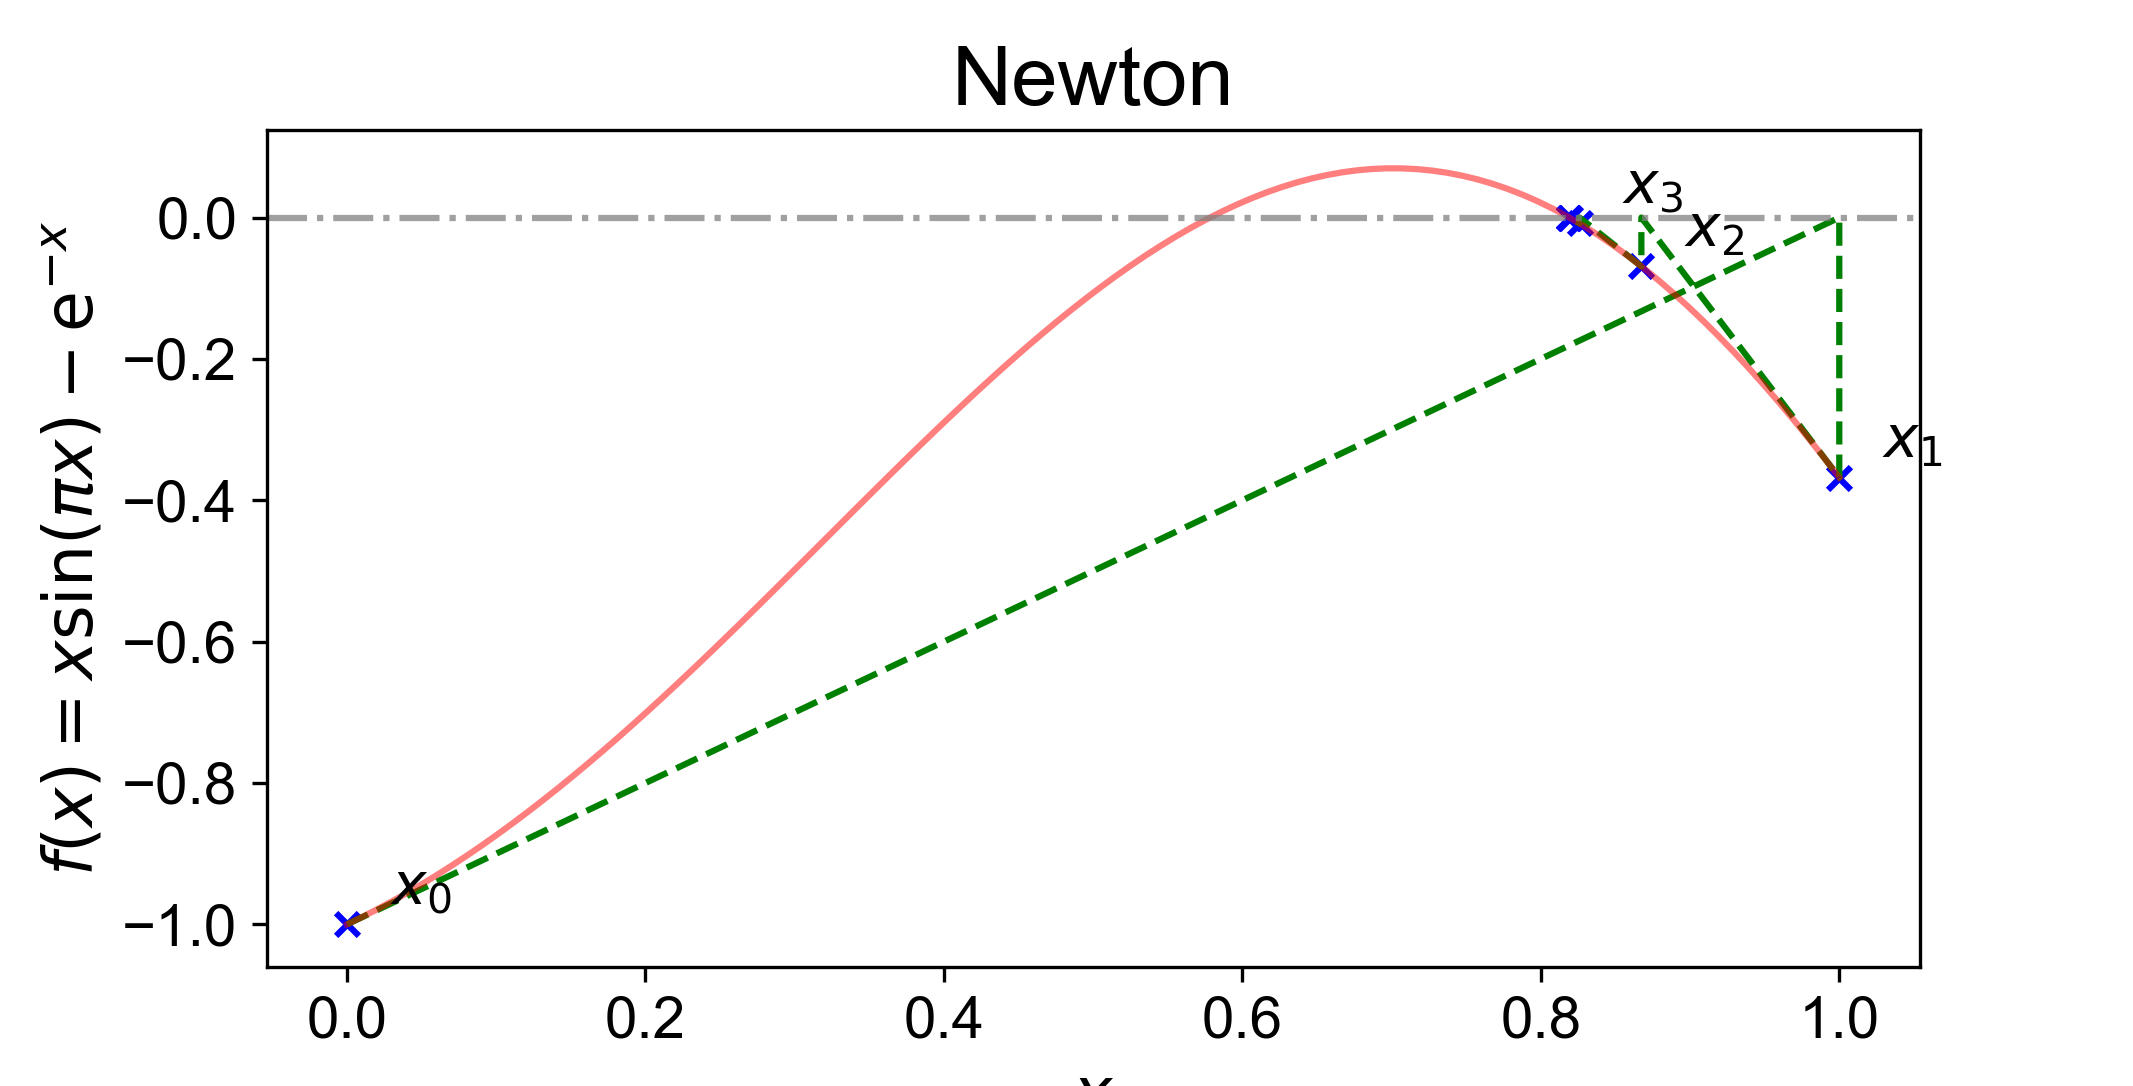

In [11]:
# THIS CELL IS FOR ILLUSTRATIONAL PURPOSES ONLY
def f(x):
    return x*np.sin(np.pi*x)-np.exp(-x)

x0 = 0.0
auxilliary_plots.newton_convergence_pattern(f, 1E-8, x0, 1E-7, 3, inset=False, 
                                            flabel='$f(x)= x \mathrm{sin}(\pi x) - \mathrm{e}^{-x}$')

<IPython.core.display.Javascript object>


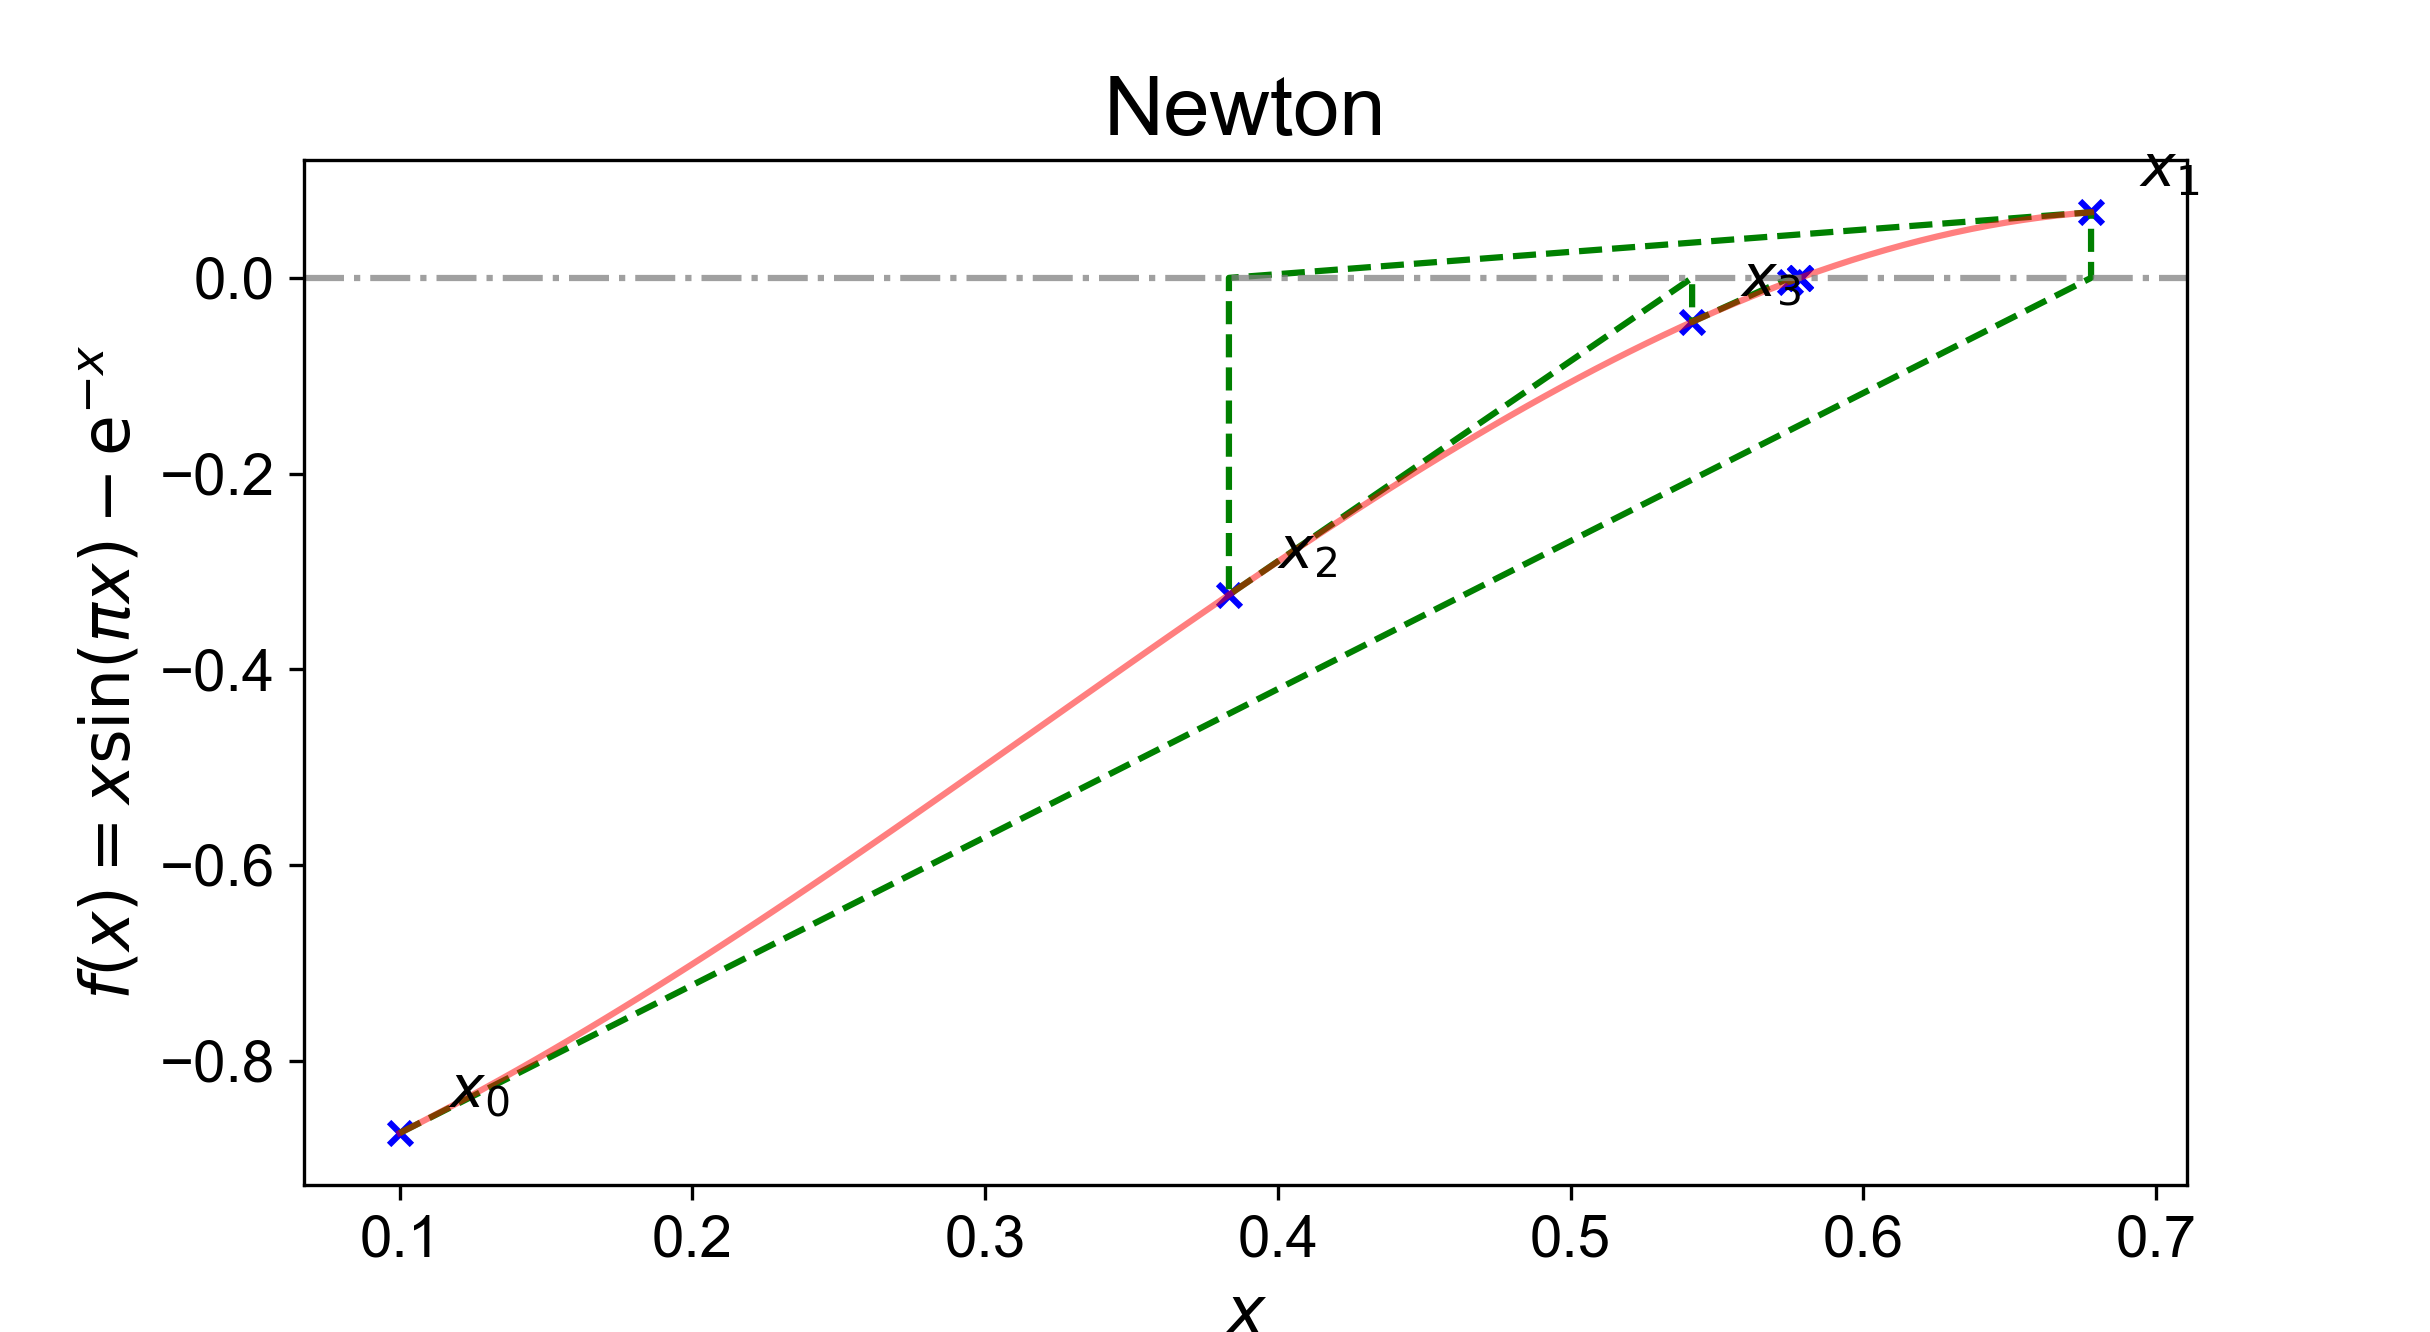

In [12]:
x0 = 0.1
auxilliary_plots.newton_convergence_pattern(f, 1E-8, x0, 1E-7, 3, inset=False, 
                                            flabel='$f(x)= x \mathrm{sin}(\pi x) - \mathrm{e}^{-x}$')

## Nearly Singular/Numerical Overflow

The gradient $f'(x_n)$ is close to $0$, so that the $x_{n+1}$ is orders of magnitude offset, perhaps too big even to be representable (overflow). 

<IPython.core.display.Javascript object>


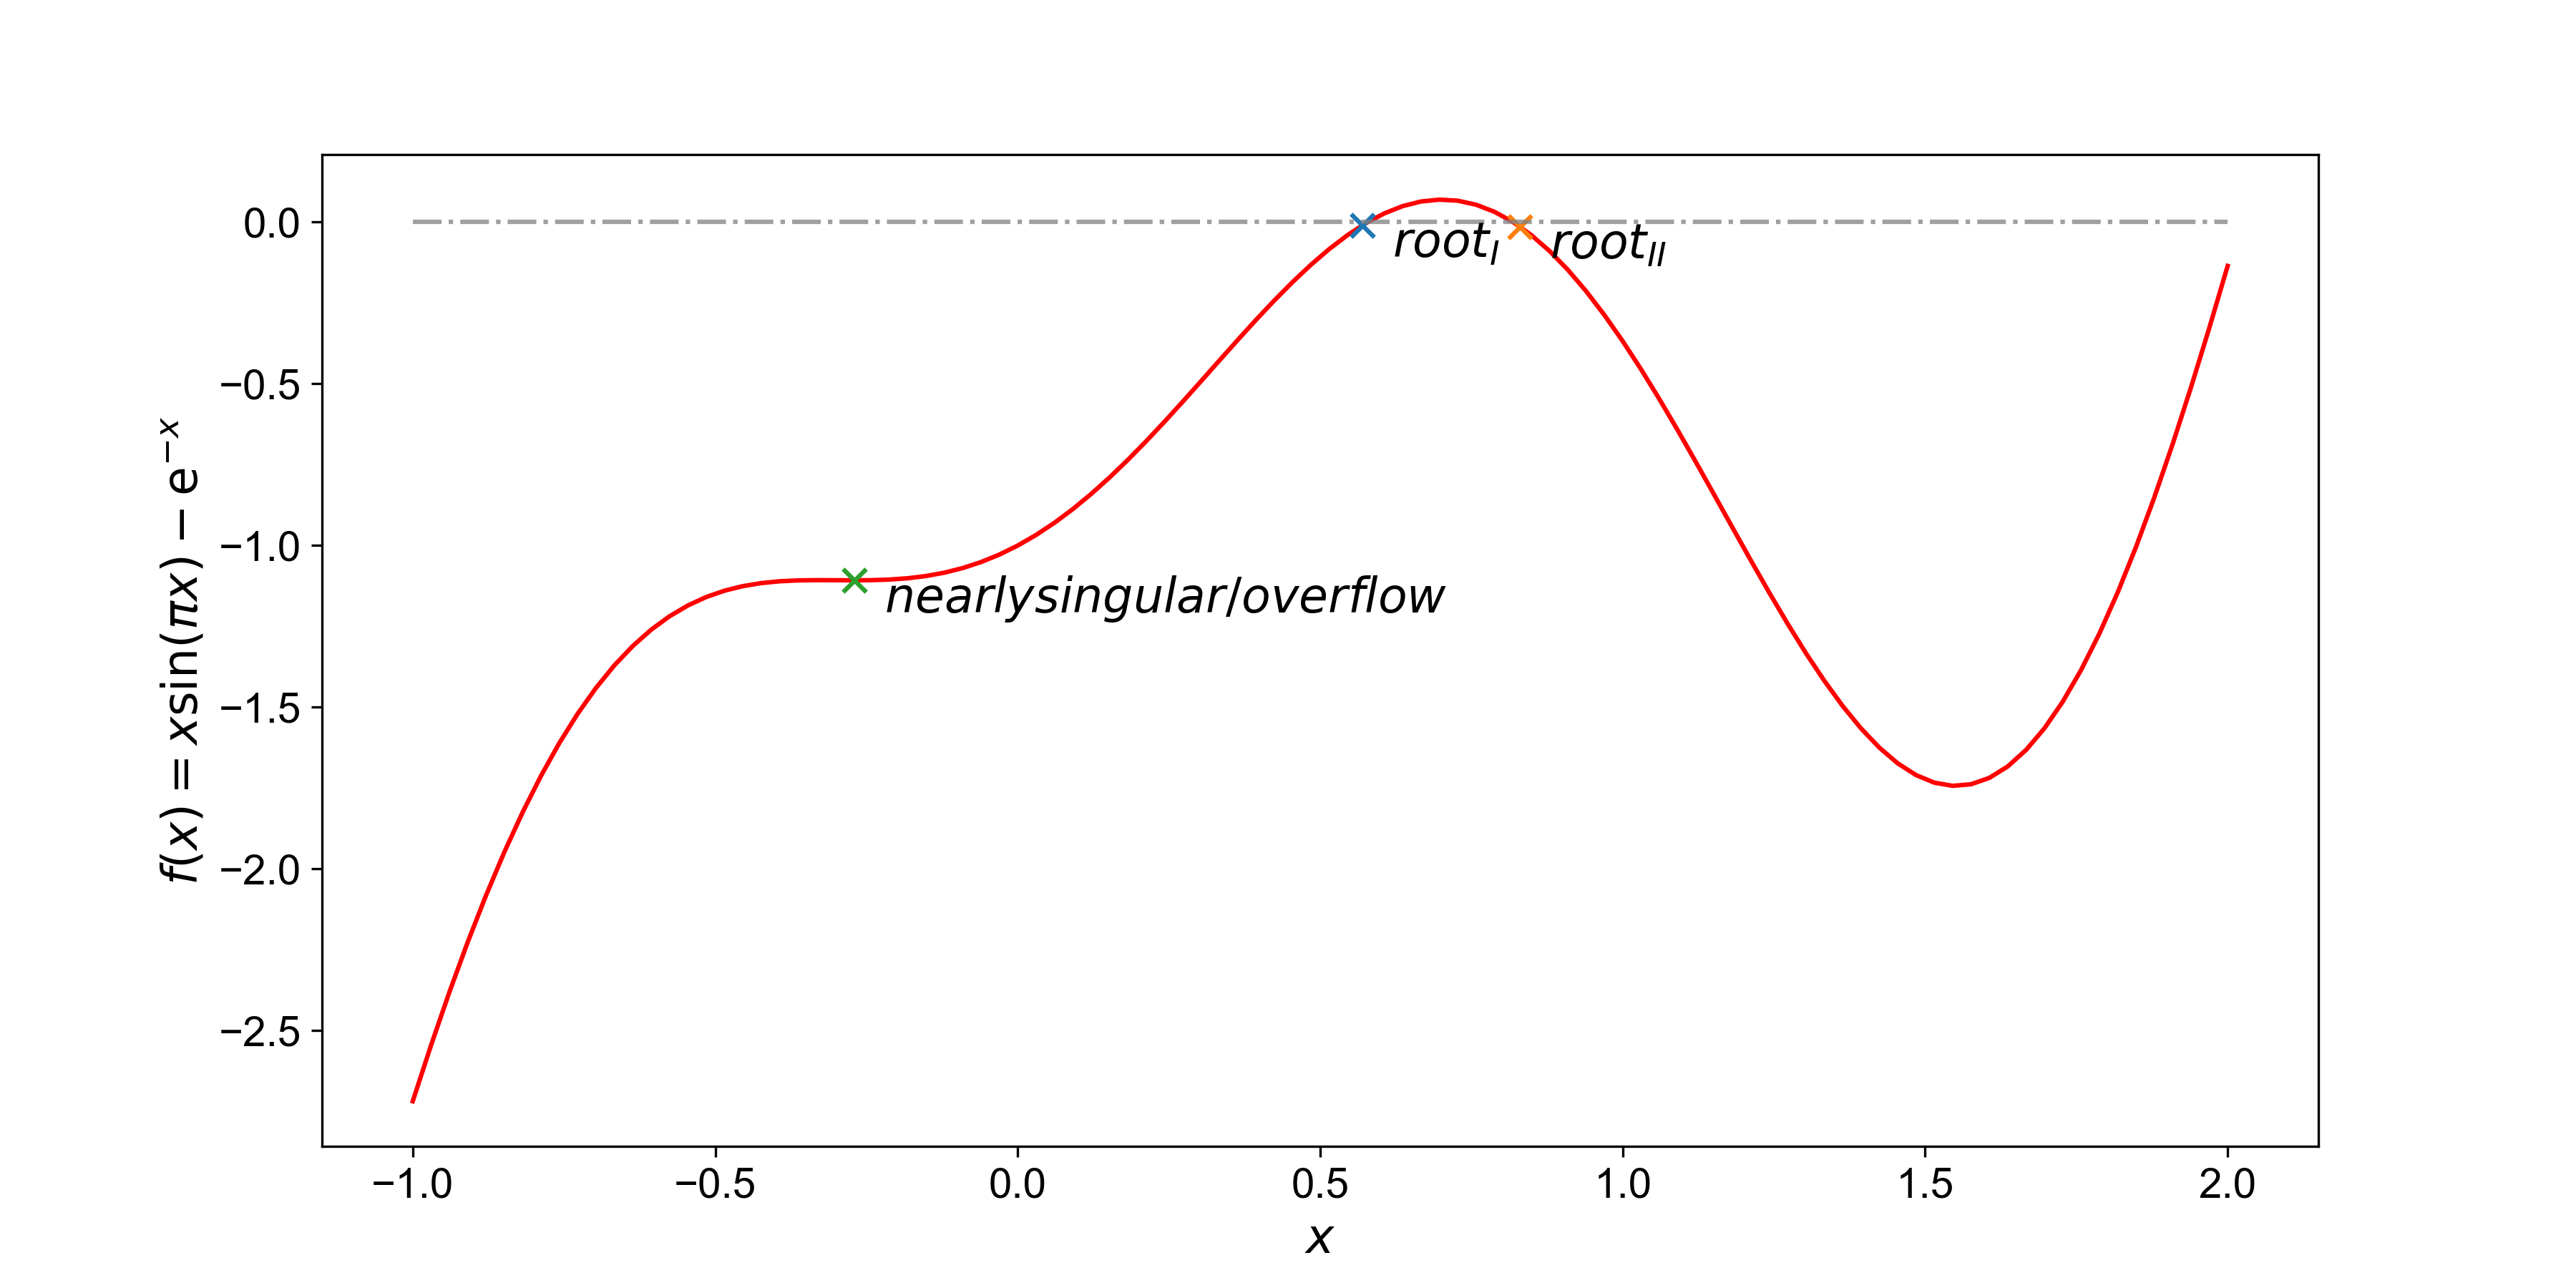

In [13]:
# THIS CELL IS FOR ILLUSTRATIONAL PURPOSES ONLY
def f(x):
    return x*sin(pi*x)-exp(-x)

x = linspace(-1, 2, 100)
y = f(x)

fig, ax = subplots(figsize=(12,6))
ax.plot(x, y, color='r',zorder=0)
xs = [0.57, 0.83, -0.27]
texts = ['$root_I$', '$root_{II}$', '$nearly singular/overflow$']
for i in range(len(xs)):
    ax.scatter([xs[i]], [f(xs[i])],marker='x',s=60)
    ax.text(xs[i]+0.05, f(xs[i])-0.1, texts[i], fontsize=16)
ax.plot(x,np.zeros_like(x),color='gray',ls='-.',alpha=0.75)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$f(x)= x \mathrm{sin}(\pi x) - \mathrm{e}^{-x}$', fontsize=16)
show()

<IPython.core.display.Javascript object>


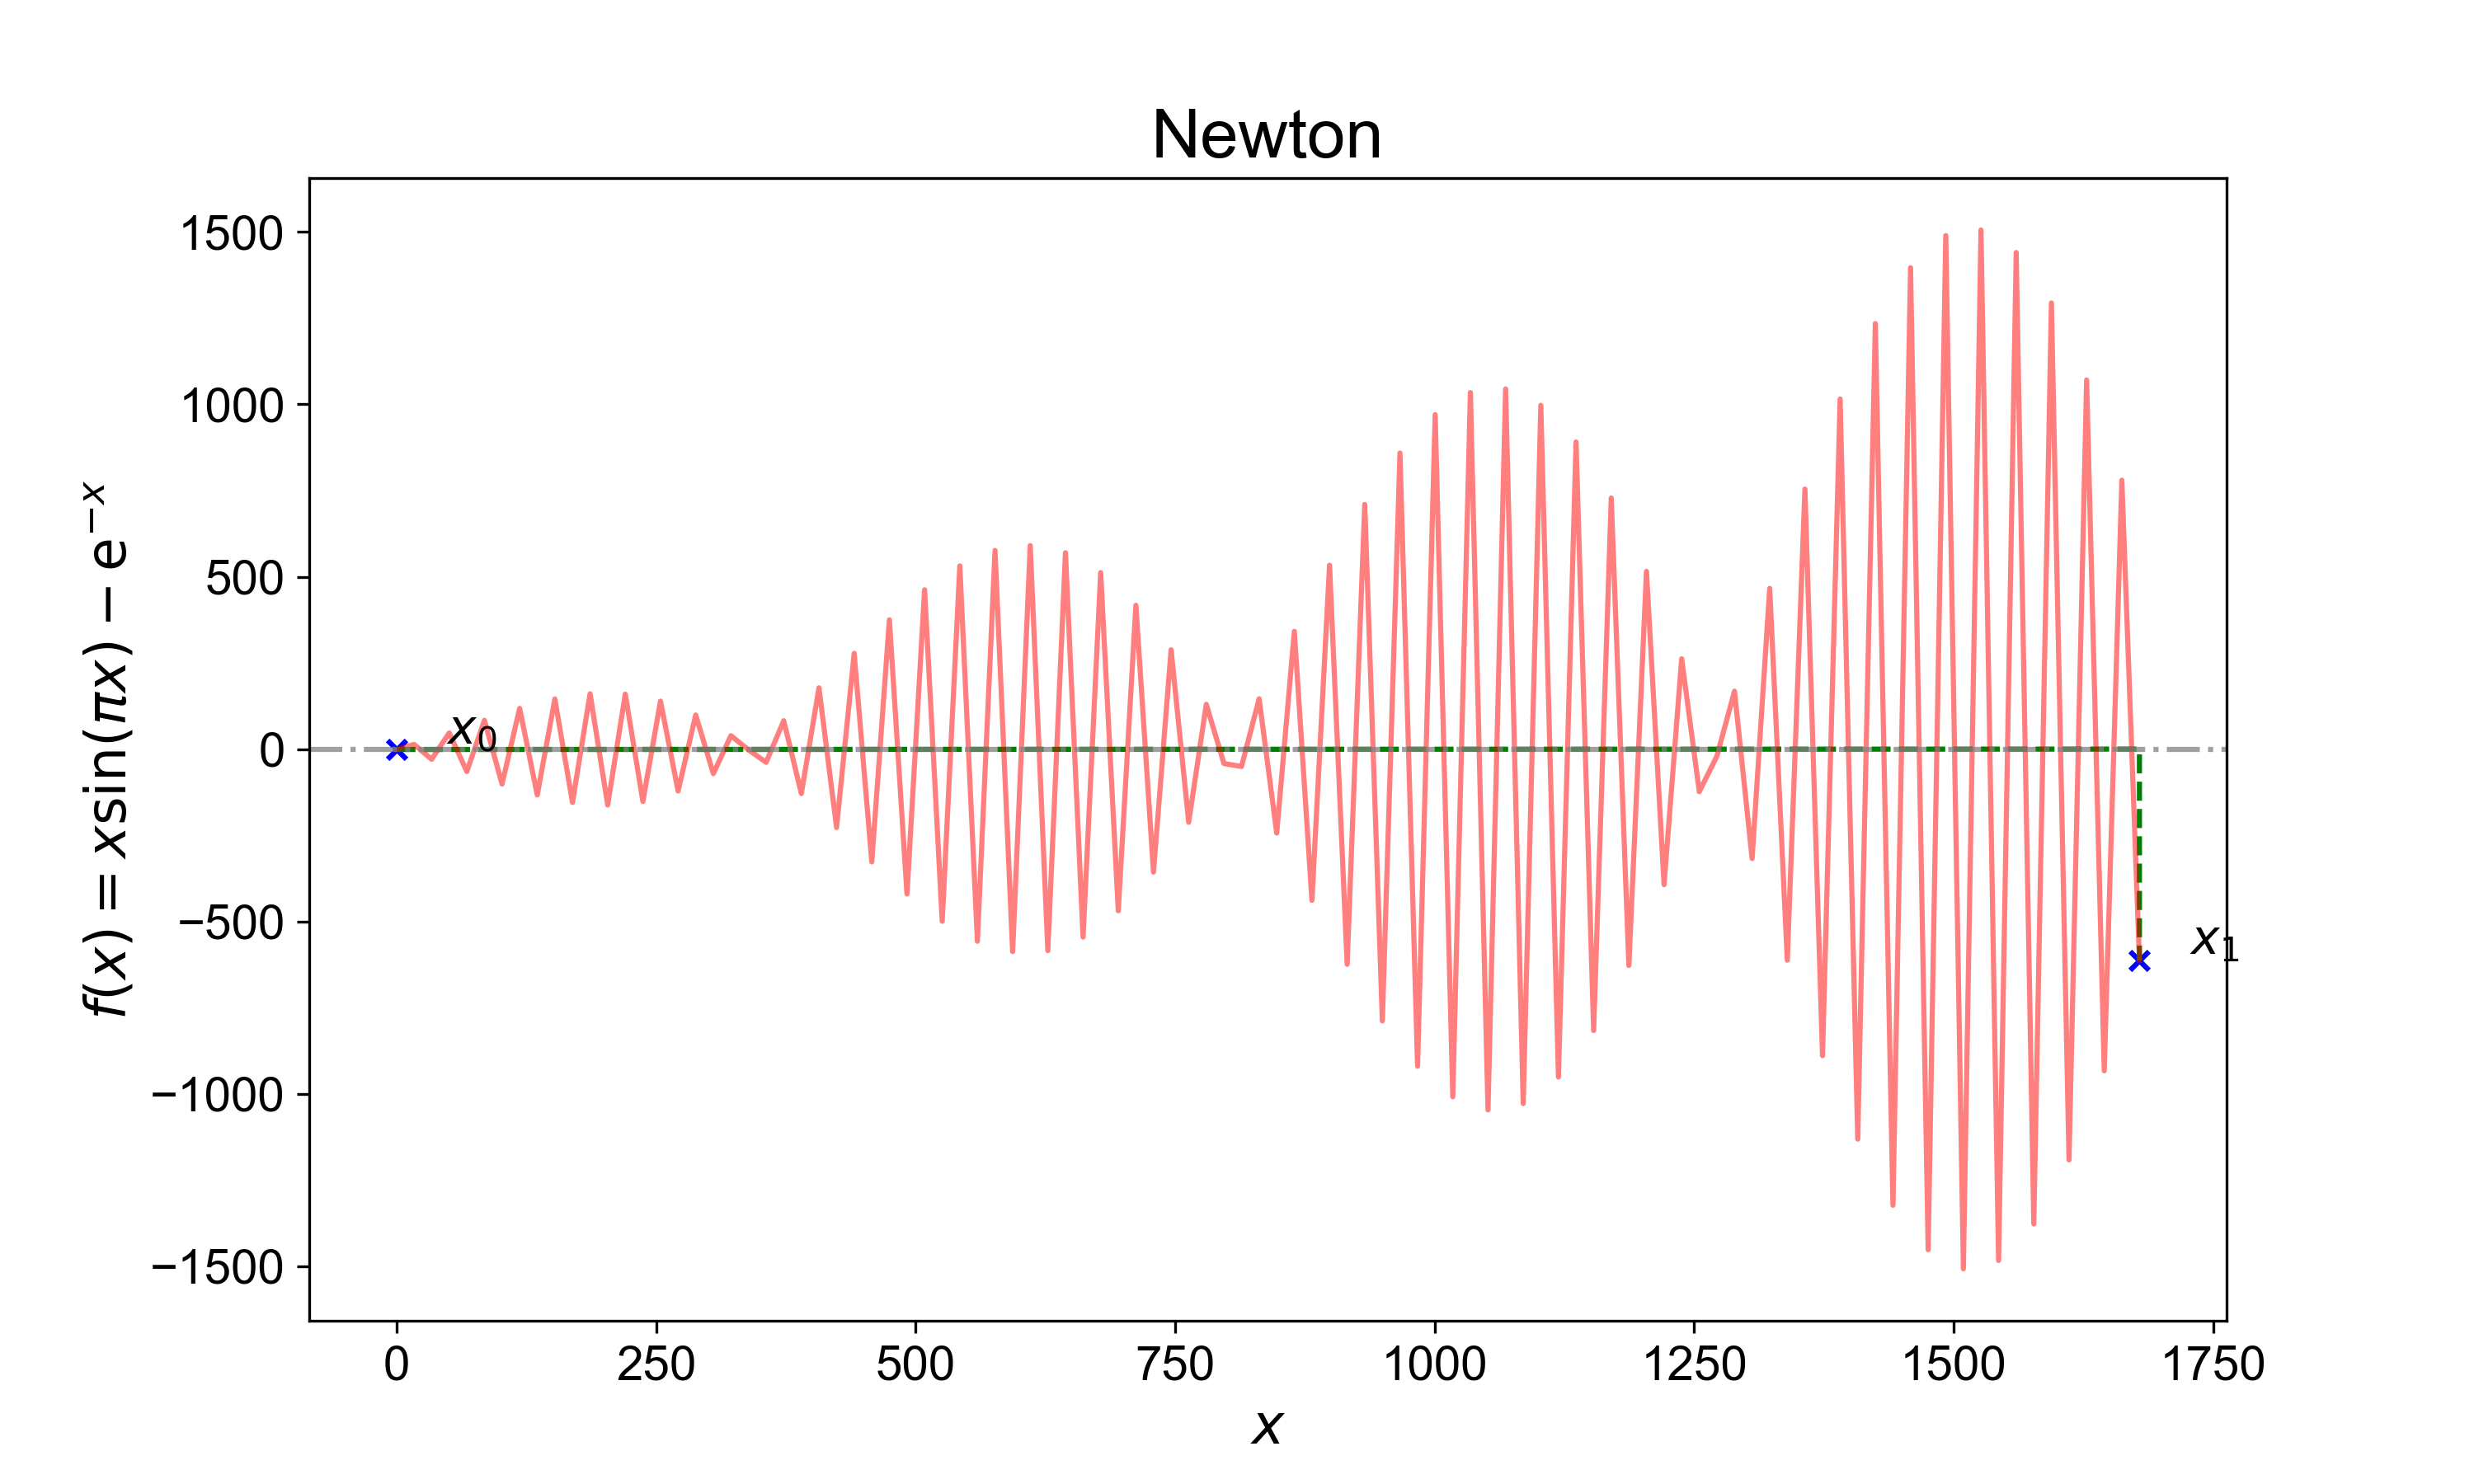

In [14]:
# THIS CELL IS FOR ILLUSTRATIONAL PURPOSES ONLY
def f(x):
    return x*sin(pi*x)-exp(-x)

x0 = -0.268
auxilliary_plots.newton_convergence_pattern(f, 1E-8, x0, 1E-7, 3, inset=False, maxiter=1, resfct=100, 
                                            flabel='$f(x)= x \mathrm{sin}(\pi x) - \mathrm{e}^{-x}$')

## Oscillation

The iterations are trapped in a region with gradients of equal magnitude but opposite directions.

<IPython.core.display.Javascript object>


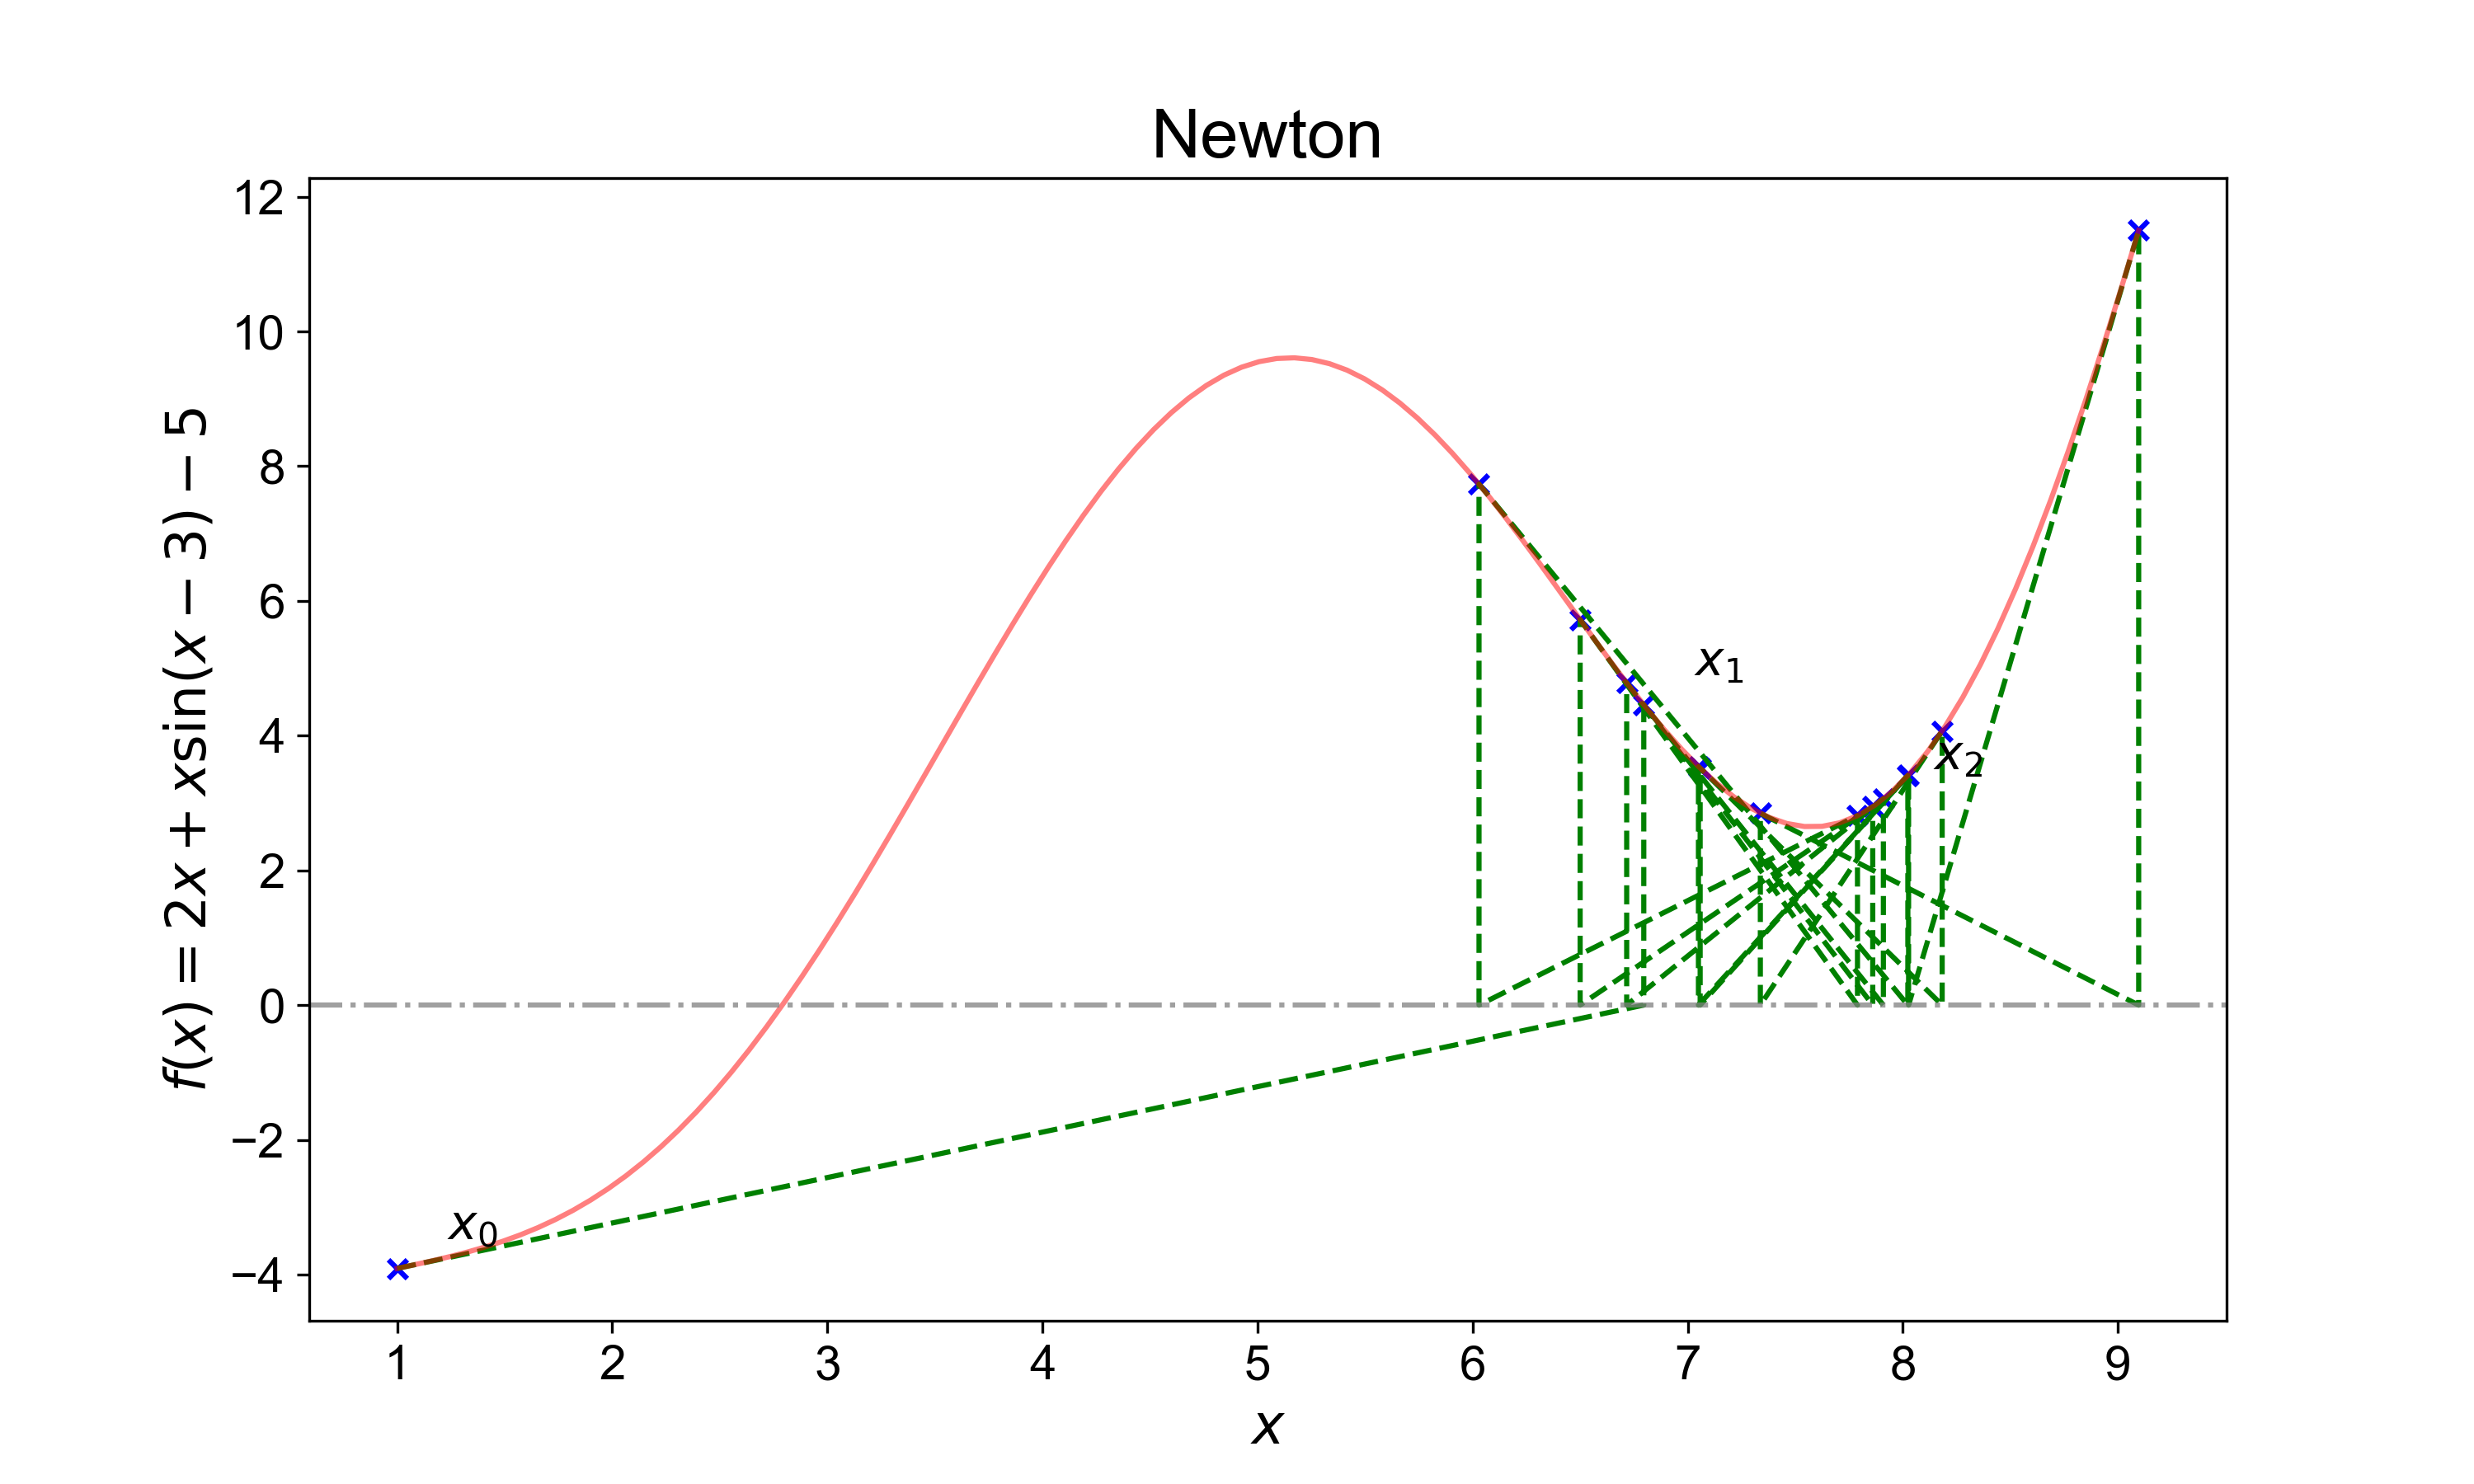

In [15]:
# THIS CELL IS FOR ILLUSTRATIONAL PURPOSES ONLY
def f(x):
    return 2*x + x*sin(x-3) - 5

x0 = 1.
auxilliary_plots.newton_convergence_pattern(f, 1E-8, x0, 1E-7, 2, inset=False, maxiter=14, 
                                            flabel='$f(x)= 2x + x\mathrm{sin}(x-3) - 5$')

<IPython.core.display.Javascript object>


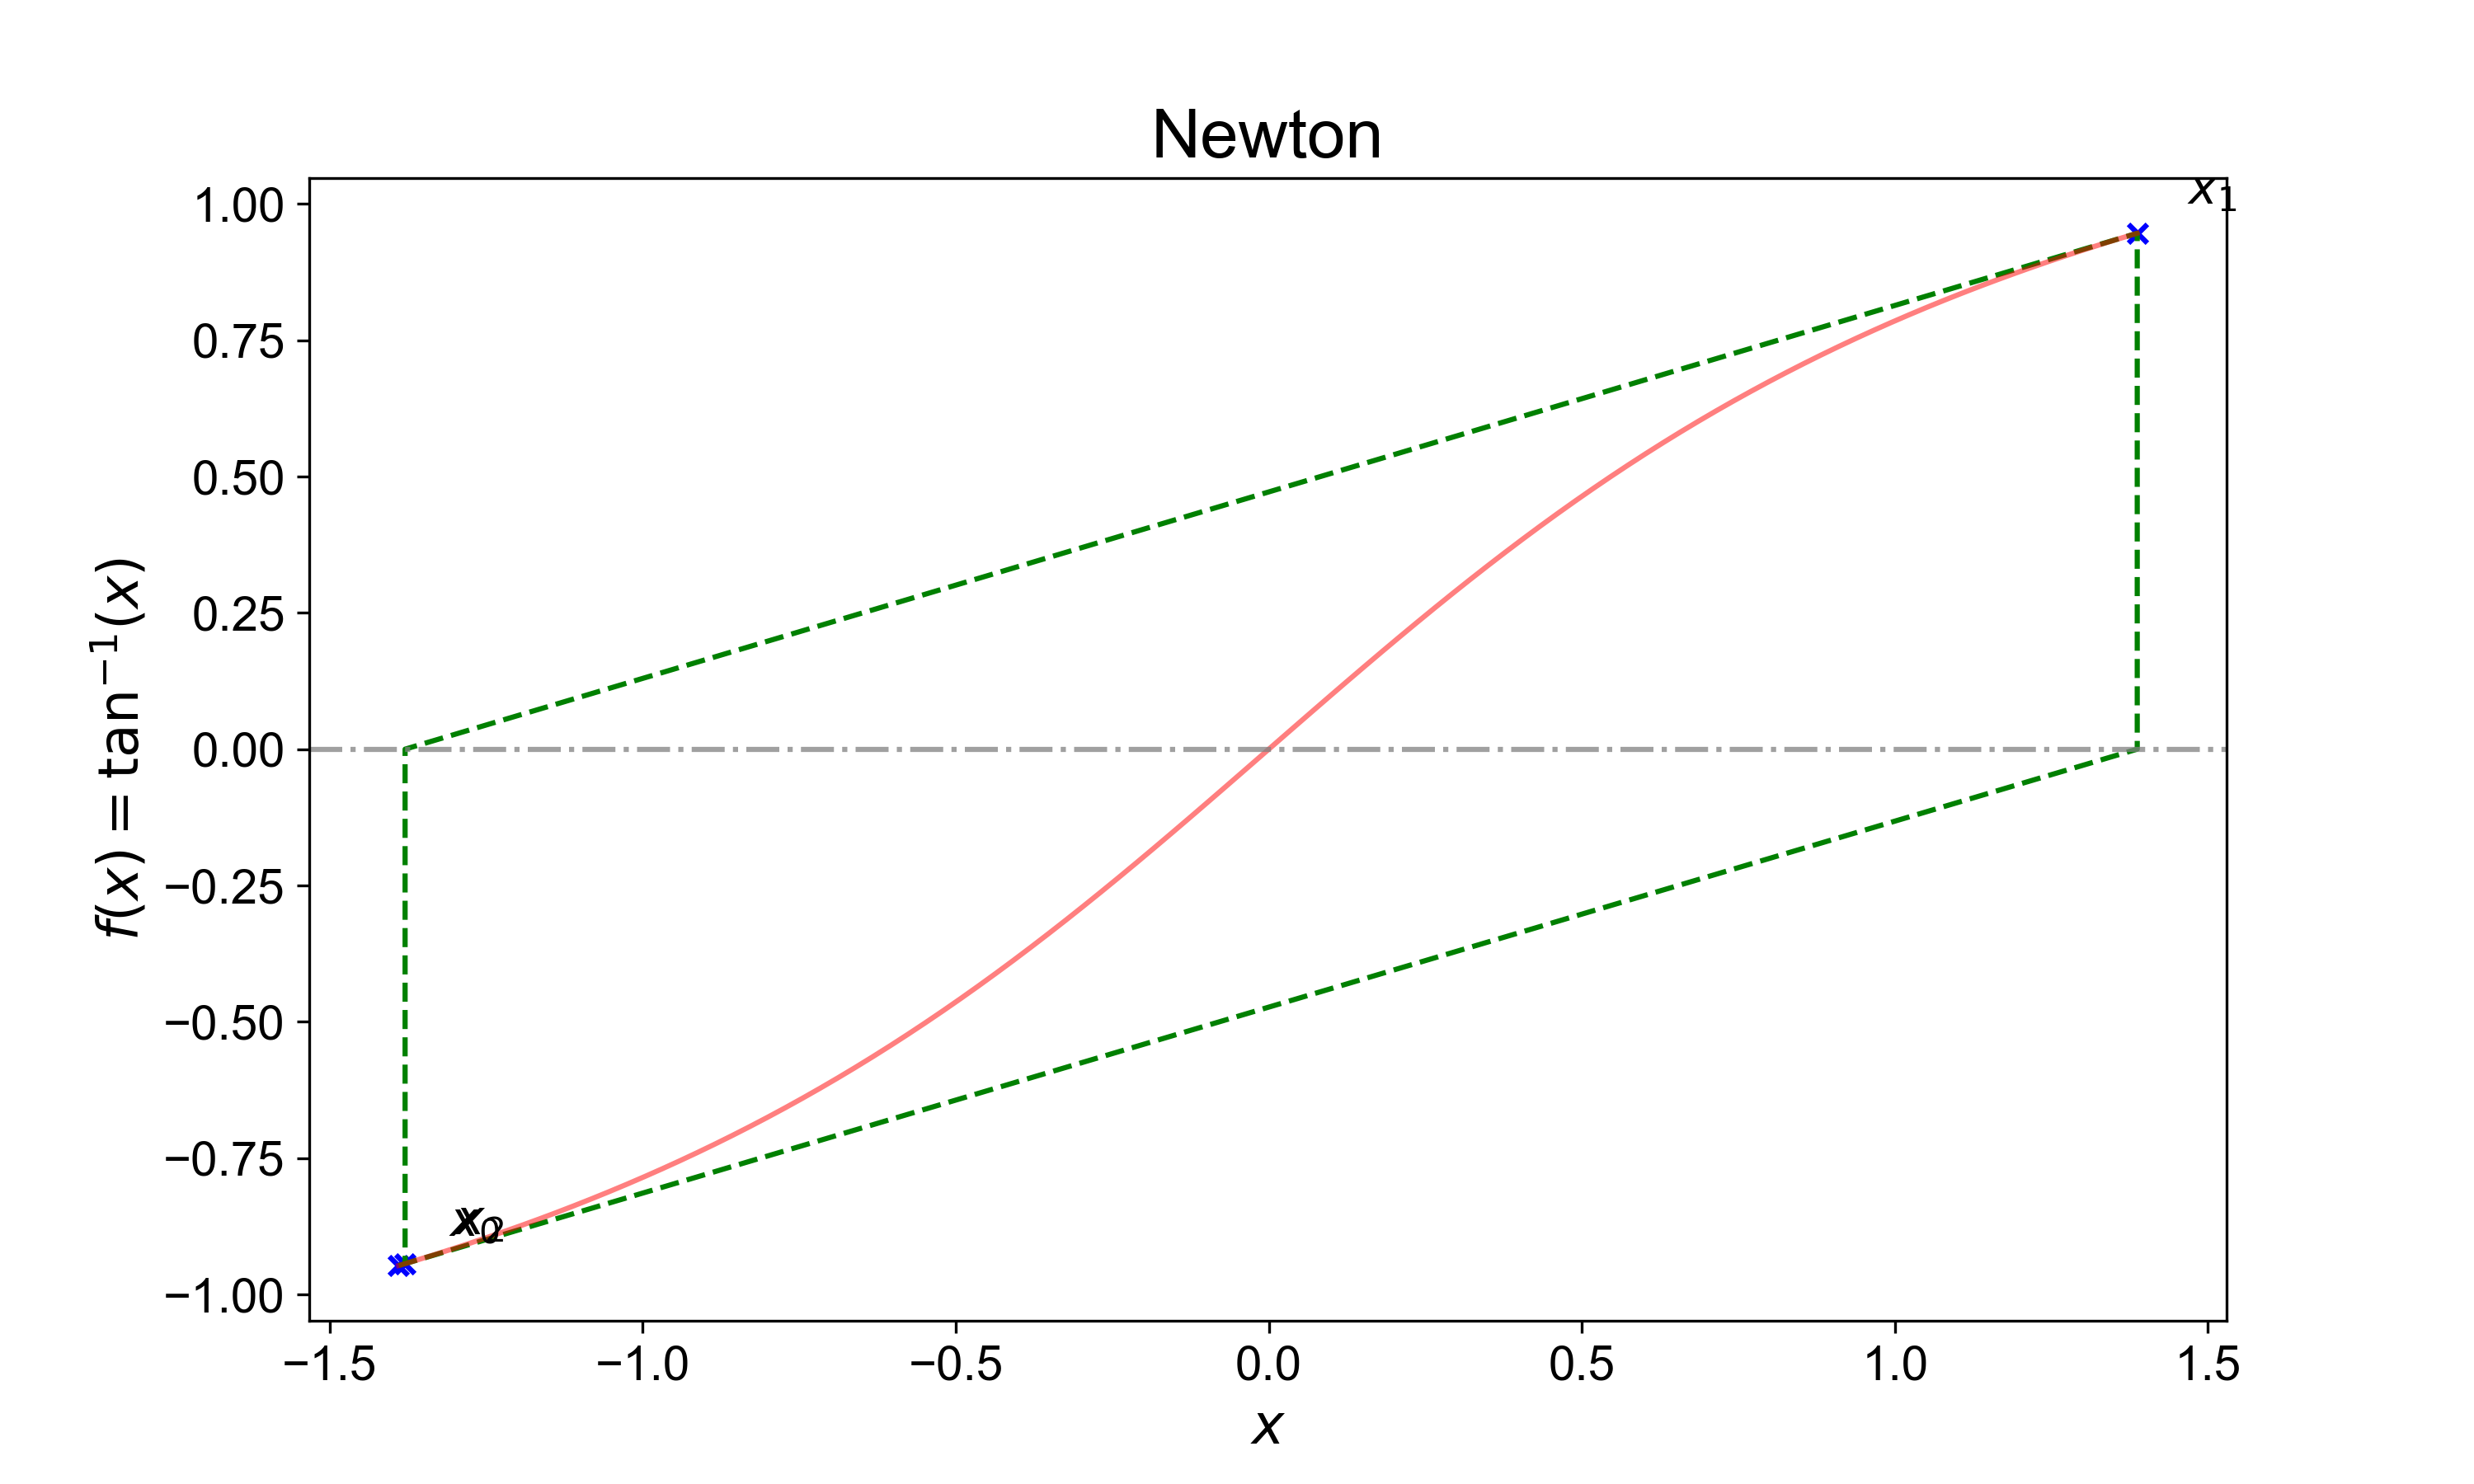

In [16]:
# THIS CELL IS FOR ILLUSTRATIONAL PURPOSES ONLY
def f(x):
    return arctan(x)

x0 = -1.39
auxilliary_plots.newton_convergence_pattern(f, 1E-8, x0, 1E-7, 2, inset=False, maxiter=2, 
                                            flabel='$f(x)= \mathrm{tan}^{-1}(x)$')

# Challenge of the day - Exercise 4.7
Copy-paste the Picard, Bisection, Newton (with analytical and numerical differentiation) and Secant algorithms and add print statements to find how many *function evaluations* each algorithm takes to reach a solution, given equal tolerances. Use any of the two equations used in this session.</span>